### Lending Club Case Study
> Upgrad Executive PG Programme in Machine Learning - May 2023

Authors:
- Sudarshan Govindaragahvan (sudarshan_g@outlook.com)
- Alpesh Kumar (kumaralpesh0695@gmail.com)

### Problem Statement
- Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.
- Two types of risks are associated with the bank’s decision:
   > 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company. <br>
   > 2. If the applicant is not likely to repay the loan, i.e., he/she is likely to default, then approving the loan may lead to a financial loss for the company. <br>

- The company wants to understand the driving factors (or driver variables) behind loan default, i.e., the variables which are strong indicators of default.

### Import libs, load dataset, examine shape, column types etc.

Libraries used while creating this notebook.

- Numpy: `1.24.3` 
- Matplotlib: `3.7.1` 
- Pandas: `1.5.3`
- Seaborn: `0.12.2`

In [2]:
#importing the required libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import the dataset and examine it.
data_source = r'./loan.csv'
loan_df = pd.read_csv(data_source)
loan_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

C:\Users\sugovi\AppData\Local\Temp\ipykernel_8132\2016734241.py:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv(data_source)


In [4]:
# Altering the display settings for pandas to show the columns. 
# Examine first 100 items 

pd.set_option('display.max_columns', 120)
loan_df.head(100)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0   1077501    1296599       5000         5000           4975.0   36 months   
1   1077430    1314167       2500         2500           2500.0   60 months   
2   1077175    1313524       2400         2400           2400.0   36 months   
3   1076863    1277178      10000        10000          10000.0   36 months   
4   1075358    1311748       3000         3000           3000.0   60 months   
..      ...        ...        ...          ...              ...         ...   
95  1068575    1303001      15300        15300          15275.0   60 months   
96  1049528    1280928      20000        12800          12775.0   60 months   
97  1068542    1303143      17500        17500          17500.0   60 months   
98  1068350    1302971       3500         3500           3500.0   36 months   
99  1067874    1302235       6000         6000           6000.0   60 months   

   int_rate  installment grade sub_grade                       emp_title  \
0    10.65%       162.87     B        B2                             NaN   
1    15.27%        59.83     C        C4                           Ryder   
2    15.96%        84.33     C        C5                             NaN   
3    13.49%       339.31     C        C1             AIR RESOURCES BOARD   
4    12.69%        67.79     B        B5        University Medical Group   
..      ...          ...   ...       ...                             ...   
95   22.06%       423.10     F        F4                            OSSI   
96   11.71%       282.86     B        B3                NCS Technologies   
97   17.27%       437.47     D        D3             Travelers Insurance   
98    6.03%       106.53     A        A1                   J&J Steel Inc   
99   12.69%       135.57     B        B5  Anadarko Petroleum Corporation   

   emp_length home_ownership  annual_inc verification_status issue_d  \
0   10+ years           RENT     24000.0            Verified  Dec-11   
1    < 1 year           RENT     30000.0     Source Verified  Dec-11   
2   10+ years           RENT     12252.0        Not Verified  Dec-11   
3   10+ years           RENT     49200.0     Source Verified  Dec-11   
4      1 year           RENT     80000.0     Source Verified  Dec-11   
..        ...            ...         ...                 ...     ...   
95    6 years           RENT     85000.0            Verified  Dec-11   
96    4 years       MORTGAGE     47800.0            Verified  Dec-11   
97    7 years       MORTGAGE     45000.0        Not Verified  Dec-11   
98  10+ years       MORTGAGE     83000.0            Verified  Dec-11   
99   < 1 year           RENT     81000.0     Source Verified  Dec-11   

    loan_status pymnt_plan                                                url  \
0    Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
1   Charged Off          n  https://lendingclub.com/browse/loanDetail.acti...   
2    Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
3    Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
4       Current          n  https://lendingclub.com/browse/loanDetail.acti...   
..          ...        ...                                                ...   
95      Current          n  https://lendingclub.com/browse/loanDetail.acti...   
96   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
97  Charged Off          n  https://lendingclub.com/browse/loanDetail.acti...   
98   Fully Paid          n  https://lendingclub.com/browse/loanDetail.acti...   
99      Current          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                 desc             purpose  \
0     Borrower added on 12/22/11 > I need to upgra...         credit_card   
1     Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                 NaN      small_business   
3

In [5]:
# Last 5 
loan_df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE    110000.0        Not Verified  Jul-07   
39713    3 years           RENT     18000.0        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE    100000.0        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE    200000.0        Not Verified  Jul-07   
39716   < 1 year            OWN     22000.0        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO  11.33            0   
39713  Retiring credit card debt    274xx         NC   6.40            1   
39714     MBA Loan Consolidation    017xx         MA   2.30            0   
39715                   JAL Loan    208xx         MD   3.72            0   
39716         Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                     0.0   
39713           Dec-86               1                     5.0   
39714           Oct-98               0                     0.0   
39715           Nov-88               0                     0.0   
39716           Oct-03               0                    11.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                     0.0        13        0       7274     13.10%   
39713                     0.0         6        0       8847     26.90%   
39714                     0.0        11        0       9698     19.40%   
39715                     0.0        17        0      85607      0.70%   
39716                     0.0         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f        0.0            0.0  2822.969293   
39713          9                   f        0.0            0.0  9913.491822   
39714         20                   f        0.0         

In [6]:
loan_df.shape

(39717, 111)

## Data cleansing <br> *Current Shape: (39717, 111)*

##### **Checking for duplicates** <br> None found.

In [7]:
loan_df.drop_duplicates(inplace=False).shape
### No duplicates on this dataset as the shape is unchanged.

(39717, 111)

##### **Null check across rows and columns** <br> 54 columns found to be entirely null, 58 columns were dropped as these had more than 25% null values.

In [8]:
## rows with all values 0
print("Rows full of null values: {0}".format(loan_df.isnull().all(axis=1).sum()))

## columns with all values 0
print("Columns full of null values: {0}".format(loan_df.isnull().all(axis=0).sum()))


Rows full of null values: 0
Columns full of null values: 54


In [9]:
## We are noticing a lot of columns that are NaN
## Let's tolerate 25% of a column being null and discard the columns that don't meet this criteria in the next step.
## This will get cut 58 columns from the dataset. 

null_percent = round(100 * loan_df.isnull().sum()/loan_df.index.size,2)
null_percent[null_percent > 25].size


58

In [10]:
## Using the index of null_percent to trim our columns.
## Checking the shape again, we should be at 53 columns.

loan_df.drop(labels=null_percent[null_percent > 25].index, axis=1, inplace=True)
loan_df.shape

(39717, 53)

##### **Drop completely distinct or completely identical columns** <br> 13 columns dropped as these had completely/high amount of distinct values or the same value.

In [11]:
## Examine variance across the 38k rows for each column. 
## if the value count matches the row count then each row has unique value which implies it won't be useful.
loan_df.nunique().sort_values(ascending=False).head(15)

id                 39717
member_id          39717
url                39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
total_rec_prncp     7976
annual_inc          5318
recoveries          4040
dtype: int64

In [12]:
# just need 1 field as index - id. Dropping the 2 columns below as they are unique for each row. 
loan_df.drop(labels=['member_id', 'url'], axis=1, inplace=True)

In [13]:
# emp_title & title cannot be used for grouping/segregation and there are too many unique values. 
loan_df.drop(labels=['emp_title', 'title'], axis=1, inplace=True)

In [14]:
# We should drop columns that have the same value for each row as it cannot reveal any trends. 
## These columns have only 1 value across 38k rows. 
loan_df.nunique()[loan_df.nunique() == 1]

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [15]:
loan_df.nunique()[loan_df.nunique() == 1].size

9

In [16]:
## Dropping 9 columns. 
loan_df.drop(labels=loan_df.nunique()[loan_df.nunique() == 1].index, axis=1, inplace=True)

In [17]:
loan_df.head()

id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  \
0  1077501       5000         5000           4975.0   36 months   10.65%   
1  1077430       2500         2500           2500.0   60 months   15.27%   
2  1077175       2400         2400           2400.0   36 months   15.96%   
3  1076863      10000        10000          10000.0   36 months   13.49%   
4  1075358       3000         3000           3000.0   60 months   12.69%   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT     24000.0   
1        59.83     C        C4   < 1 year           RENT     30000.0   
2        84.33     C        C5  10+ years           RENT     12252.0   
3       339.31     C        C1  10+ years           RENT     49200.0   
4        67.79     B        B5     1 year           RENT     80000.0   

  verification_status issue_d  loan_status         purpose zip_code  \
0            Verified  Dec-11   Fully Paid     credit_card    860xx   
1     Source Verified  Dec-11  Charged Off             car    309xx   
2        Not Verified  Dec-11   Fully Paid  small_business    606xx   
3     Source Verified  Dec-11   Fully Paid           other    917xx   
4     Source Verified  Dec-11      Current           other    972xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0           Jan-85               1         3   
1         GA   1.00            0           Apr-99               5         3   
2         IL   8.72            0           Nov-01               2         2   
3         CA  20.00            0           Feb-96               1        10   
4         OR  17.94            0           Jan-96               0        15   

   pub_rec  revol_bal revol_util  total_acc  out_prncp  out_prncp_inv  \
0        0      13648     83.70%          9       0.00           0.00   
1        0       1687      9.40%          4       0.00           0.00   
2        0       2956     98.50%         10       0.00           0.00   
3        0       5598        21%         37       0.00           0.00   
4        0      27783     53.90%         38     524.06         524.06   

    total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  \
0   5863.155187          5833.84          5000.00         863.16   
1   1008.710000          1008.71           456.46         435.17   
2   3005.666844          3005.67          2400.00         605.67   
3  12231.890000         12231.89         10000.00        2214.92   
4   3513.330000          3513.33          2475.94        1037.39   

   total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  \
0                0.00        0.00                     0.00       Jan-15   
1                0.00      117.08                     1.11       Apr-13   
2                0.00        0.00                     0.00       Jun-14   
3               16.97        0.00                     0.00       Jan-15   
4                0.00        0.00                     0.00       May-16   

   last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  
0           171.62             May-16                   0.0  
1           119.66             Sep-13                   0.0  
2           649.91             May-16                   0.0  
3           357.48             Apr-16                   0.0  
4            67.79             May-16                   0.0

In [18]:
loan_df.shape

(39717, 40)

We are down to 40 columns.

##### **Removing prefix from term column**

In [19]:
loan_df.term = loan_df.term.str.lstrip(' ')

##### **Filtering to either fully paid or defaulted applicants.** <br> We are dropping 1140 records for which loan_status is current


In [20]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [21]:
# Current is not needed as we are interested in factors that 
# can tell us who could be a good/bad applicant for loan. 

loan_df = loan_df[loan_df.loan_status != 'Current']

In [22]:
loan_df.shape

(38577, 40)

##### **Dropping columns related to current loan applicants. These are not relevant for fully paid off and charged off applicants.** <br> We dropped 10 more columns related to current applicants.

In [23]:
loan_df.drop(['total_rec_prncp', 'total_rec_int', 
              'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
              'last_pymnt_amnt', 'last_credit_pull_d', 'out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [24]:
loan_df.shape

(38577, 30)

##### **Converting columns (issue_d, earliest_cr_line) to datetime & deriving columns from issue_d.** <br> Added 6 columns - issue_d_year, issue_d_month, issue_d_month_name, earliest_cr_line_month, earliest_cr_line_month_name, earliest_cr_line_year

In [25]:
# Converting these columns that are in MMM-YY format to date time series.
# issue_d, last_pymnt_d and earliest_cr_line
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')

## Adjust for vale in 1900s like Jan-85, Apr-99 etc.
loan_df.earliest_cr_line = loan_df.earliest_cr_line.apply(lambda x: x - pd.DateOffset(years=100) if x.year > 2023 else x)

# Deriving issue_d_year, issue_d_month and issue_d_month_name -> added 3 columns.
loan_df['issue_d_year'] = loan_df.issue_d.dt.year
loan_df['issue_d_month'] = loan_df.issue_d.dt.month
loan_df['issue_d_month_name'] = loan_df.issue_d.dt.month_name()

loan_df['earliest_cr_line_year'] = loan_df.earliest_cr_line.dt.year
loan_df['earliest_cr_line_month'] = loan_df.earliest_cr_line.dt.month
loan_df['earliest_cr_line_month_name'] = loan_df.earliest_cr_line.dt.month_name()

##### **Converting columns (int_rate, revol_util and emp_length) to appropriate types.** <br> int_rate and revol_util converted to float. Records which have revol_util as null are dropped.

In [26]:
# removing the % symbol from int, revol_util columns so that they can be parsed numerically.
loan_df.int_rate = loan_df.int_rate.str.rstrip('%').astype(float)
loan_df.revol_util = loan_df.revol_util.str.rstrip('%').astype(float)

In [27]:
loan_df = loan_df[loan_df.revol_util.isna() != True]
loan_df.shape

(38527, 36)

We are now at 38527 records with 36 columns.

##### **Fixing emp_length** <br> We have about 1k records where emp_length is blank. Fixing that and converting this to a numeric for interpretation. <br> For emp_length < 1 we mark it as 0. For emp_length values that are blank, we use the mean as there are not many outliers in this series.

In [28]:
# We have about 1k records where emp_length is blank.
loan_df.emp_length.isna().sum()

1030

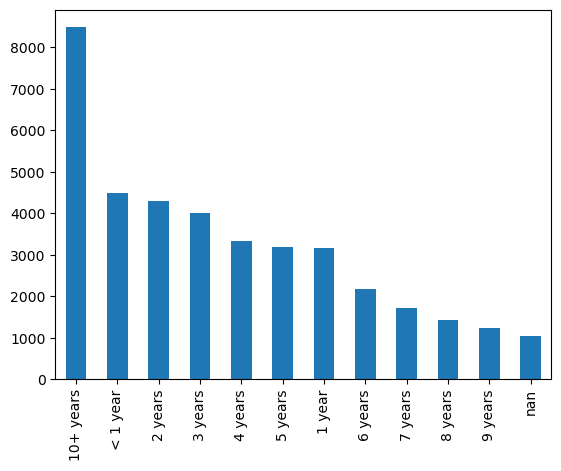

In [29]:
# Distribution before imputing blanks
loan_df.emp_length.value_counts(dropna=False).plot.bar()
plt.show()

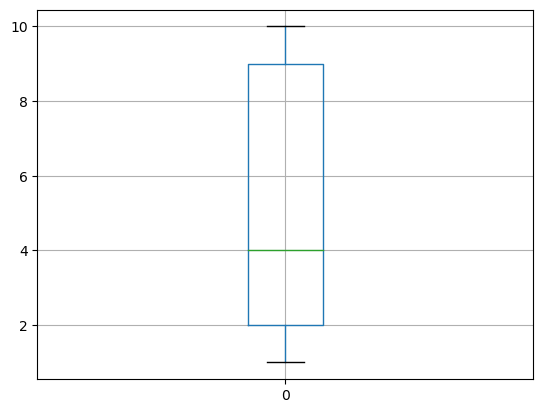

In [30]:
# Box plot of emp_length with digits extracted shows the median as 4, with majority values between 2 and 9.
loan_df[loan_df.emp_length.isna() == False].emp_length.str.extract('(\d{1,2})').astype('int').boxplot()
plt.show()

In [31]:
# Let's compute the mean value and use that to fill the blanks as this series doesn't have that many outliers. 
loan_df.loc[loan_df.emp_length == '< 1 year', ['emp_length']] = '0 years'
emp_length_nums = loan_df[loan_df.emp_length.isna() == False].emp_length.str.extract('(\d{1,2})').astype('int');

# Fill the mean as string to be consistent with the other values.
emp_length_mean = str(emp_length_nums.mean()[0])
loan_df.emp_length = loan_df.emp_length.fillna(emp_length_mean)

# Now, extract the digits from the series and store it as numeric
loan_df.emp_length = loan_df.emp_length.str.extract('(\d{1,2})').astype('int')

loan_df.emp_length.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.98])

count    38527.000000
mean         4.918187
std          3.512816
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
90%         10.000000
95%         10.000000
98%         10.000000
max         10.000000
Name: emp_length, dtype: float64

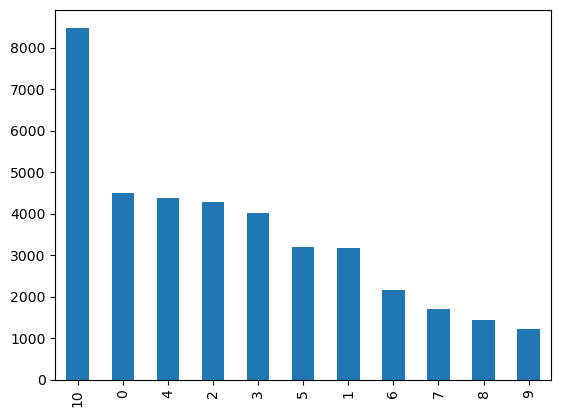

In [32]:
# Distribution after imputing blanks
loan_df.emp_length.value_counts(dropna=False).plot.bar()
plt.show()

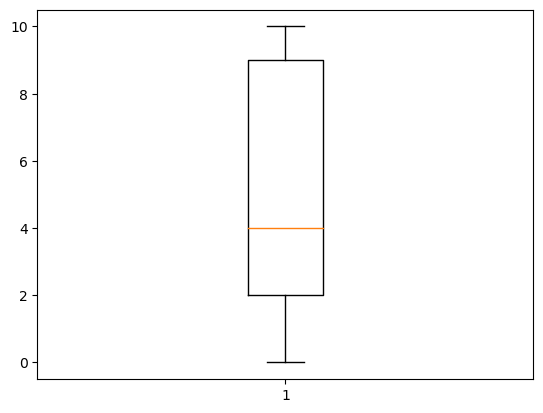

In [33]:
plt.boxplot(loan_df.emp_length)
plt.show()

In [34]:
loan_df.emp_length.isna().sum()

0

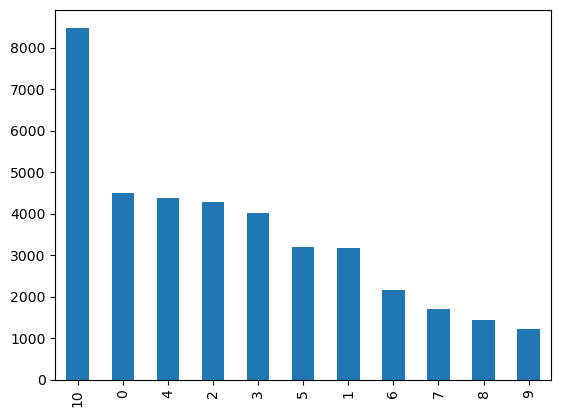

In [35]:
# Distribution after imputing blanks with mean value of 5.
loan_df.emp_length.value_counts(dropna=False).plot.bar()
plt.show()

In [36]:
# Most common emp_length is 10 years.
loan_df.emp_length.mode()[0]

10

##### **Fixing nulls in pub_rec_bankruptices**

In [37]:
# We have about ~700 NaN values in pub_rec_bankruptcies.
loan_df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36189
1.0     1636
NaN      697
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

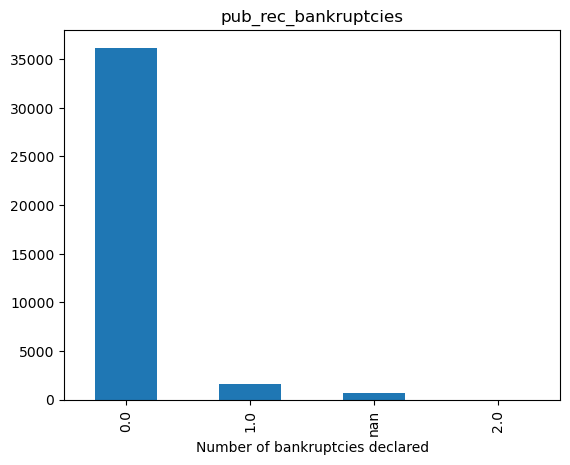

In [38]:
loan_df.pub_rec_bankruptcies.value_counts(dropna=False).plot.bar()
plt.xlabel('Number of bankruptcies declared')
plt.title('pub_rec_bankruptcies')
plt.show()


In [39]:
# If the number of pub_rec_bankruptices is not available, we will consider it to be 0. 
loan_df.pub_rec_bankruptcies.fillna(0.0, inplace=True)

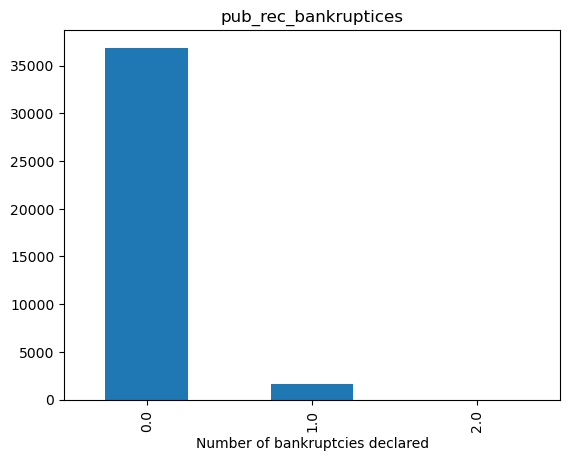

In [40]:
loan_df.pub_rec_bankruptcies.value_counts(dropna=False).plot(kind='bar')
plt.xlabel('Number of bankruptcies declared')
plt.title('pub_rec_bankruptices')
plt.show()

In [41]:
loan_df.isna().sum()

id                             0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
total_pymnt                    0
total_pymnt_inv                0
pub_rec_bankruptcies           0
issue_d_ye

Now, there are no blank values in any of the columns.

In [42]:
loan_df.shape

(38527, 36)

##### **Examining annual_inc, funded_amnt and loan_amnt to remove outliers**

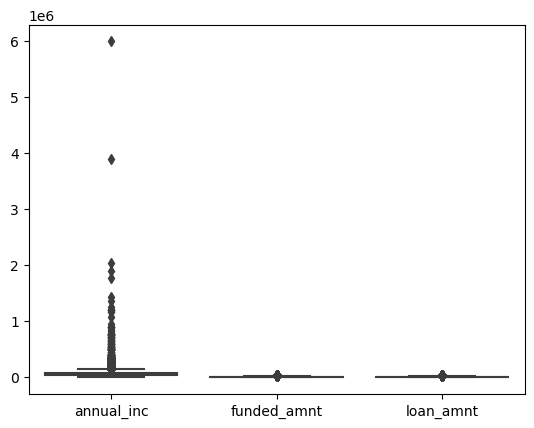

In [43]:
sns.boxplot(loan_df[['annual_inc', 'funded_amnt', 'loan_amnt']])
plt.show()

In [44]:
pd.options.display.float_format = '{:.2f}'.format
print(loan_df.annual_inc.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98]))
pd.reset_option('display.float_format')


count     38527.00
mean      68809.23
std       64214.93
min        4000.00
25%       40000.00
50%       59000.00
75%       82000.00
90%      115000.00
95%      140004.00
98%      187000.00
max     6000000.00
Name: annual_inc, dtype: float64


In [45]:
# Trimming at 98%
loan_df = loan_df[loan_df.annual_inc < loan_df.annual_inc.quantile(0.98)]

In [46]:
loan_df.issue_d_year.value_counts()

2011    20088
2010    11298
2009     4598
2008     1530
2007      240
Name: issue_d_year, dtype: int64

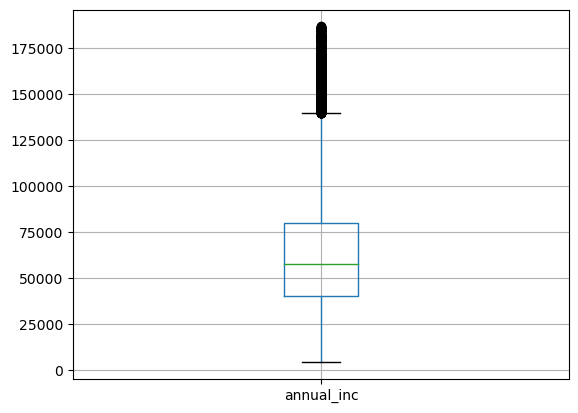

In [47]:
# After removing outliers in annual_inc, this is how the plot looks
loan_df[['annual_inc']].boxplot()
plt.show()

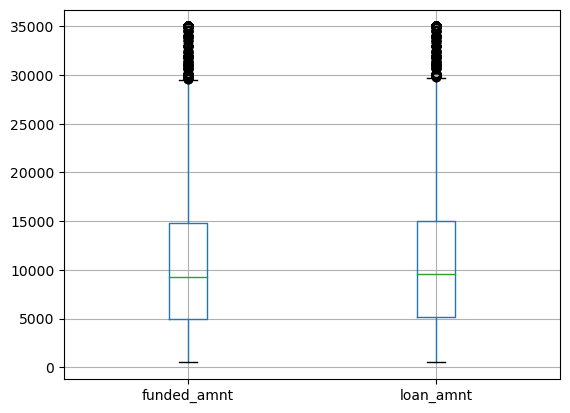

In [48]:
loan_df[['funded_amnt', 'loan_amnt']].boxplot()
plt.show()

### Removing records that have `NONE` in home_ownership.

In [49]:
loan_df = loan_df[loan_df.home_ownership != 'NONE']

In [50]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'pub_rec_bankruptcies', 'issue_d_year',
       'issue_d_month', 'issue_d_month_name', 'earliest_cr_line_year',
       'earliest_cr_line_month', 'earliest_cr_line_month_name'],
      dtype='object')

### Derived Column: Loan amount to annual income ratio <br> (loan_amnt/annual_inc)

In [51]:
loan_df['loan_to_income'] = (loan_df.loan_amnt/loan_df.annual_inc).round(2)

### Derived Column: Interest rate group (int_rate_grp).

In [52]:
loan_df.int_rate.describe()

count    37751.000000
mean        11.904876
std          3.680350
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

In [53]:
bins = np.linspace(5,25,6)
labels = ['Lowest (5-9%)','Lower (9-13%)','Normal (13-17)%','Higher (17-21%)','Highest (21-25)%']
loan_df['int_rate_grp'] = pd.cut(loan_df['int_rate'], bins=bins, labels=labels)

### Shape

In [54]:
loan_df.shape

(37751, 38)

In [55]:
### defaulters
defaulters = loan_df[loan_df.loan_status != 'Fully Paid']
fully_paid = loan_df[loan_df.loan_status == 'Fully Paid']

print("All Records: {0}, Defaulters: {1}, Fully Paid:{2}".format(loan_df.shape, defaulters.shape, fully_paid.shape))

All Records: (37751, 38), Defaulters: (5532, 38), Fully Paid:(32219, 38)


We are now at 37751 records with 38 columns after data cleansing and column derivation.

## Univariate analysis 
*(Analyzing each column for distribution of values)*<br> Shape: (37751, 38)

### **Loan Status** (*Current status of the loan*)

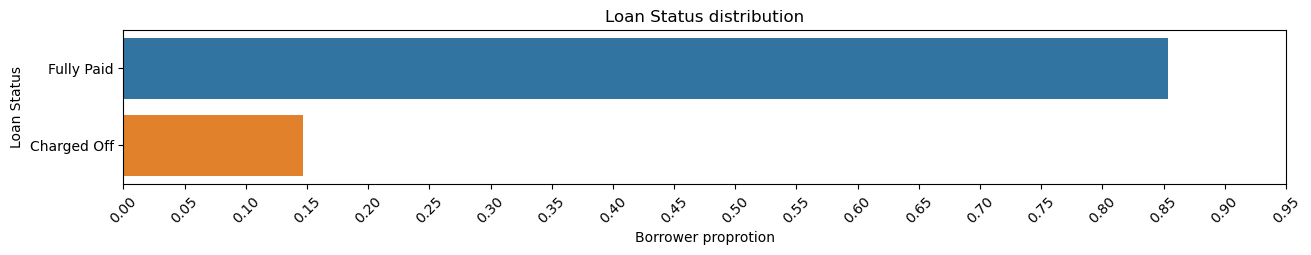

In [56]:
plt.figure(figsize=(15,2))
sns.barplot(data=loan_df.loan_status.value_counts(normalize=True).reset_index(), y='index', x='loan_status')
plt.title('Loan Status distribution')
plt.ylabel('Loan Status')
plt.xlabel('Borrower proprotion')
plt.xticks(np.arange(0,1.0,0.05), rotation=45)
plt.show()

In [57]:
loan_df.loan_status.value_counts()

Fully Paid     32219
Charged Off     5532
Name: loan_status, dtype: int64

**Findings**: About 15% borrowers were defaulters. 85% of the borrowers paid the lending club back in full.

### **Loan Amount** (*The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.*)

In [58]:
print("Median loan amount: {0:.2f}\n{1}"
      .format(loan_df.loan_amnt.median(), 
              loan_df.loan_amnt.describe()))

Median loan amount: 9600.00
count    37751.000000
mean     10895.475617
std       7210.920487
min        500.000000
25%       5150.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


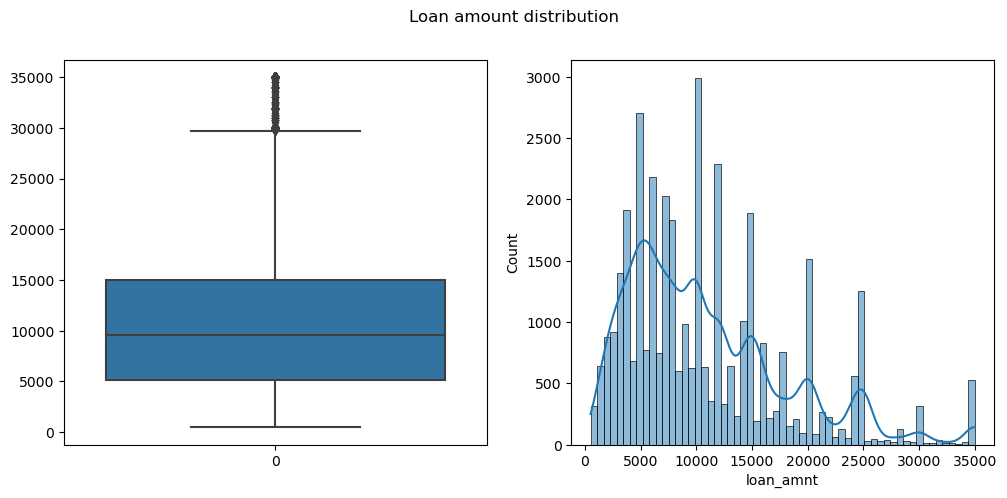

In [59]:
fig_size = (12,5)
data_to_plot = loan_df.loan_amnt
x_label = 'loan_amnt'
plot_title = 'Loan amount distribution'

plt.figure(figsize=fig_size)

# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=data_to_plot)

# Hist plot
plt.subplot(1,2,2)
sns.histplot(data=loan_df, x=x_label, kde=True)
plt.xlabel(xlabel=x_label)

plt.suptitle(plot_title)
plt.show()

**Findings:** The mean loan amount is about 10.9k with the median around 9.6k. <br> The histogram plot shows that very few borrowers took loan above 30k and a lot of borrowers opted for 10k.

### **Funded amount** (*The total amount committed to that loan at that point in time.*)

In [60]:
print("Median funded amount: {0}\n{1}".format(loan_df.funded_amnt.median(), loan_df.funded_amnt.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.98])))

Median funded amount: 9250.0
count    37751.000000
mean     10638.767185
std       6955.616863
min        500.000000
25%       5000.000000
50%       9250.000000
75%      14800.000000
90%      20000.000000
95%      25000.000000
98%      30000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


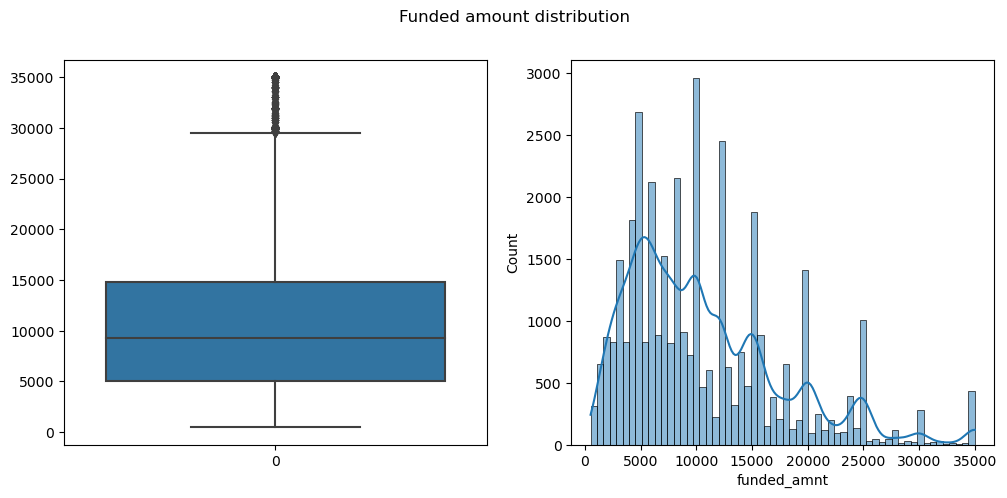

In [61]:
fig_size = (12,5)
data_to_plot = loan_df.funded_amnt
x_label = 'funded_amnt'
plot_title = 'Funded amount distribution'

plt.figure(figsize=fig_size)

# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=data_to_plot)

# Hist plot
plt.subplot(1,2,2)
sns.histplot(data=loan_df, x=x_label, kde=True)
plt.xlabel(xlabel=x_label)

plt.suptitle(plot_title)
plt.show()

**Findings:** Amount funded is nearly inline with the loan amount with the mean around 10.63k and median of 9.25k. <br> Majority of the borrowers opted for a loan_amnt between 5000.00 to 15000.00<br> We see peaks at every multiple of 5k (12.5k being an exception), with 10k being the highest peak.

### **Funded amount invested** *(The total amount committed by investors for that loan at that point in time.)* <br> 

In [62]:
loan_df.funded_amnt_inv.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.98])

count    37751.000000
mean     10087.277722
std       6887.913618
min          0.000000
25%       5000.000000
50%       8500.000000
75%      13975.000000
90%      19950.000000
95%      24142.658895
98%      29000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

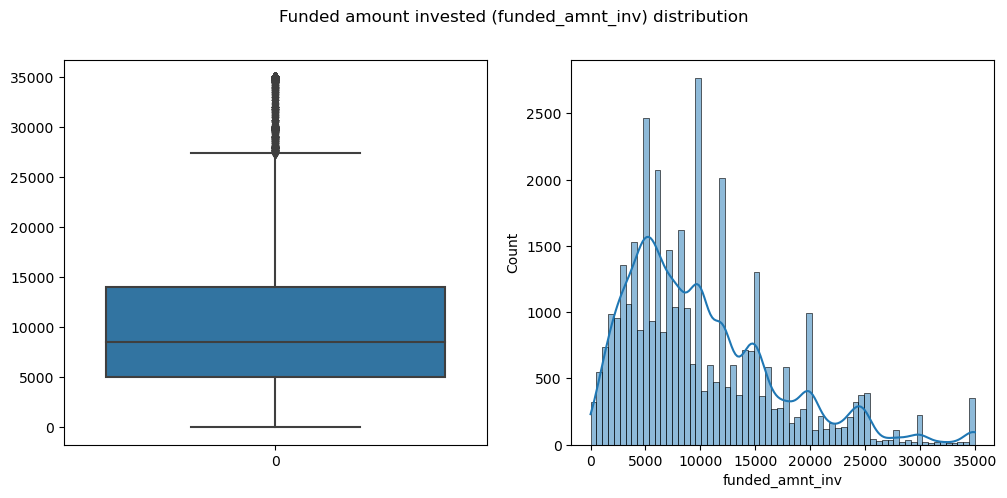

In [63]:
fig_size = (12,5)
data_to_plot = loan_df.funded_amnt_inv
x_label = 'funded_amnt_inv'
plot_title = 'Funded amount invested (funded_amnt_inv) distribution'

plt.figure(figsize=fig_size)

# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=data_to_plot)

# Hist plot
plt.subplot(1,2,2)
sns.histplot(data=loan_df, x=x_label, kde=True)
plt.xlabel(xlabel=x_label)

plt.suptitle(plot_title)
plt.show()

**Findings:** This pattern closely matches `loan_amnt` and `funded_amnt`, implying that lending club approved the loan upto the funding provided by the investors.

### **Loan Purpose** *(A category provided by the borrower for the loan request.)*

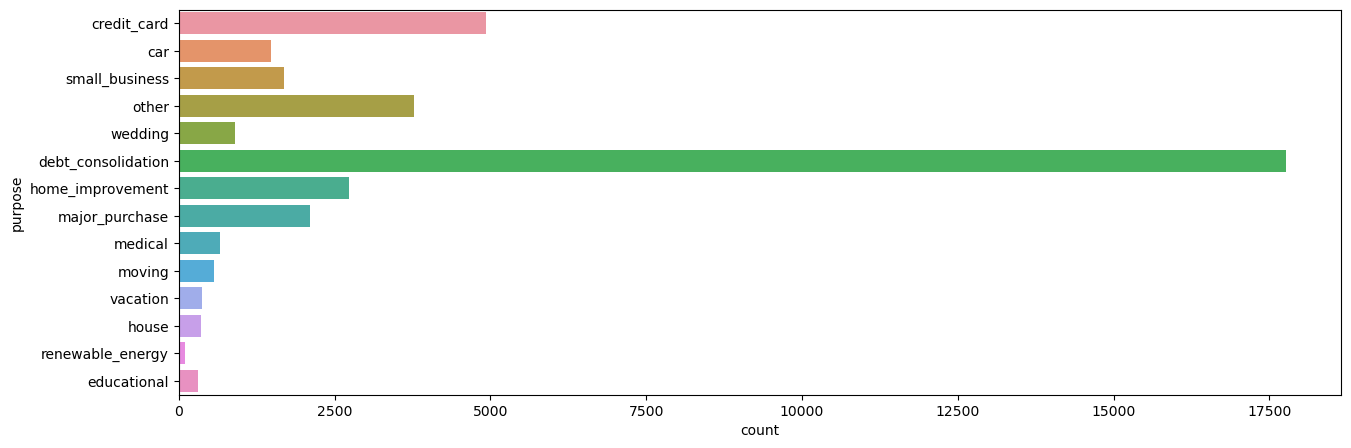

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(data=loan_df, y='purpose')
plt.show()

**Findings:** Loan purpose is mainly `debt_consolidation`, with the 2nd highest purpose being `credit_card`. The least is `renewable_energy`

### **Verification Status** *(Indicates if income was verified by LC, not verified, or if the income source was verified)*

In [65]:
loan_df.verification_status.value_counts(normalize=True).reset_index()

index  verification_status
0     Not Verified             0.436995
1         Verified             0.313157
2  Source Verified             0.249848

In [66]:
loan_df.verification_status.value_counts()

Not Verified       16497
Verified           11822
Source Verified     9432
Name: verification_status, dtype: int64

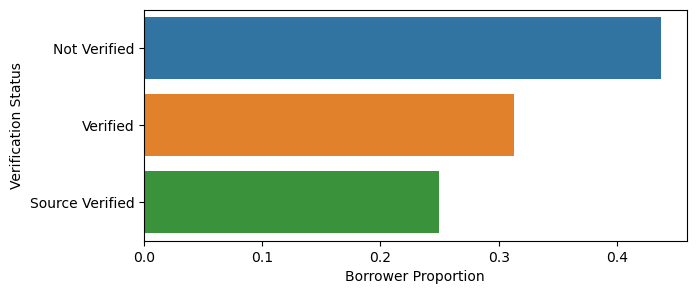

In [67]:
plt.figure(figsize=(7,3))
sns.barplot(data=loan_df.verification_status.value_counts(normalize=True).reset_index(),y='index', x='verification_status')
plt.ylabel('Verification Status')
plt.xlabel('Borrower Proportion')
plt.show()

In [68]:
loan_df['loan_status'].value_counts()

Fully Paid     32219
Charged Off     5532
Name: loan_status, dtype: int64

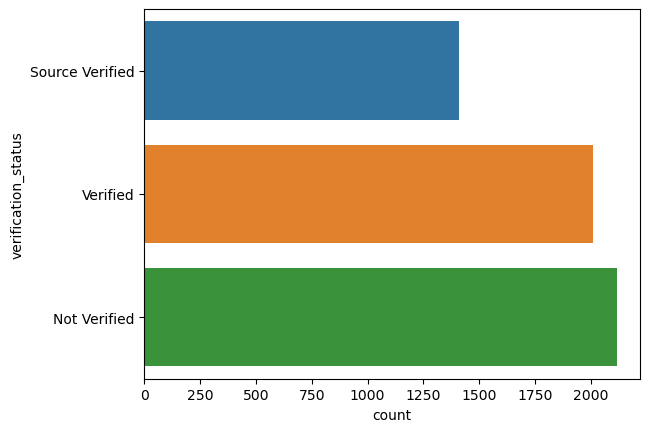

In [69]:
sns.countplot(y=defaulters['verification_status'], data = defaulters)
plt.show()

**Findings:** We see that a large proportion of borrowers were not verified by LC (~43.7%). Verification can reduce the possibility of a default.

### **Interest Rate and Interest Rate Group** *(Interest Rate on the loan)* 

In [70]:
print("Median interest rate: {0}\n{1}"
      .format(loan_df.int_rate.median(), 
              loan_df.int_rate.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98])))

Median interest rate: 11.71
count    37751.000000
mean        11.904876
std          3.680350
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
90%         16.770000
95%         18.300000
98%         19.910000
max         24.400000
Name: int_rate, dtype: float64


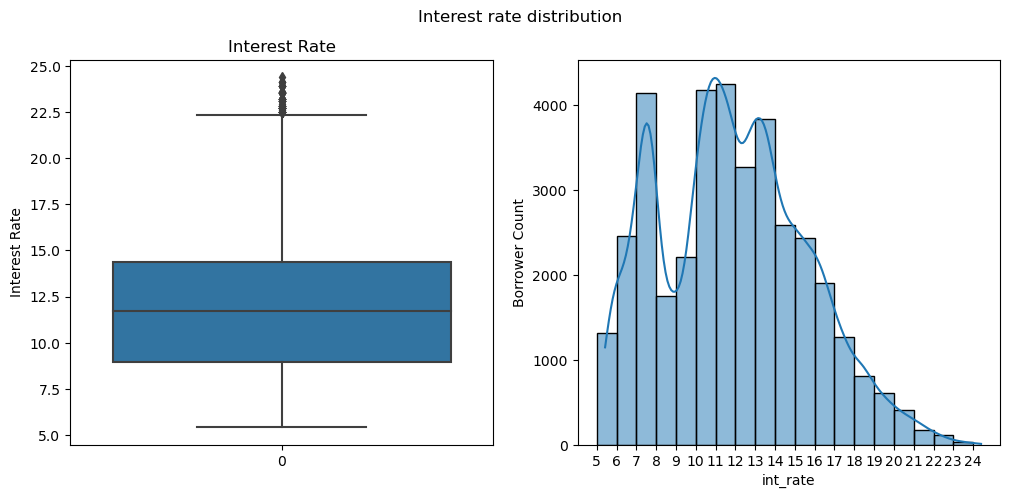

In [71]:
fig_size = (12,5)
data_to_plot = loan_df
x_label = 'int_rate'
plot_title = 'Interest rate distribution'

plt.figure(figsize=fig_size)

# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=data_to_plot.int_rate)
plt.ylabel('Interest Rate')
plt.title('Interest Rate')

# Hist plot
plt.subplot(1,2,2)
sns.histplot(data=data_to_plot, x=x_label, kde=True, bins=np.arange(5,25,1))
plt.xlabel(xlabel=x_label)
plt.ylabel('Borrower Count')
plt.xticks(ticks=np.arange(5,25,1))
plt.suptitle(plot_title)

plt.show()

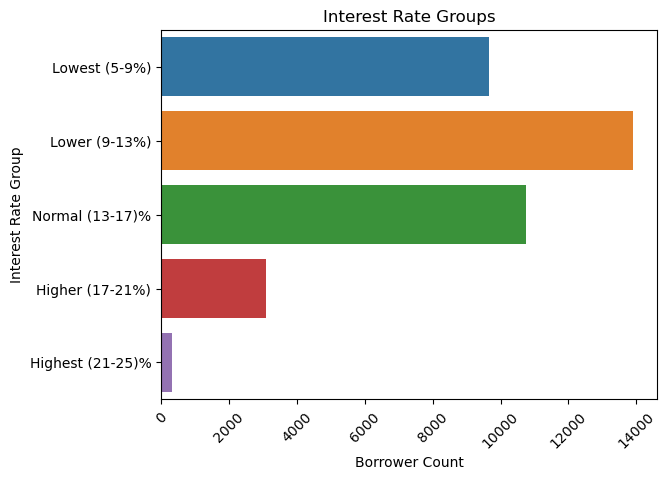

In [72]:
# Interest Rate Groups
sns.countplot(data = data_to_plot, y='int_rate_grp')
plt.xlabel('Borrower Count')
plt.ylabel('Interest Rate Group')
plt.xticks(rotation=45)
plt.title('Interest Rate Groups')
plt.show()

**Findings:** Majority of the borrowers have interest rates between 9% to ~15% as per the box plot, with some outliers beyond 22.5%. <br> The median rate is around 11.7% and the mean being 11.9%. Less than 2% of the borrowers had interest rate beyond 19%. When binned linearly, the 9-13% bucket has the highest count of borrowers.

### **Loan Term** *(The number of payments on the loan. Values are in months and can be either 36 or 60.)*

In [73]:
loan_df.term.value_counts(normalize=True)

36 months    0.754841
60 months    0.245159
Name: term, dtype: float64

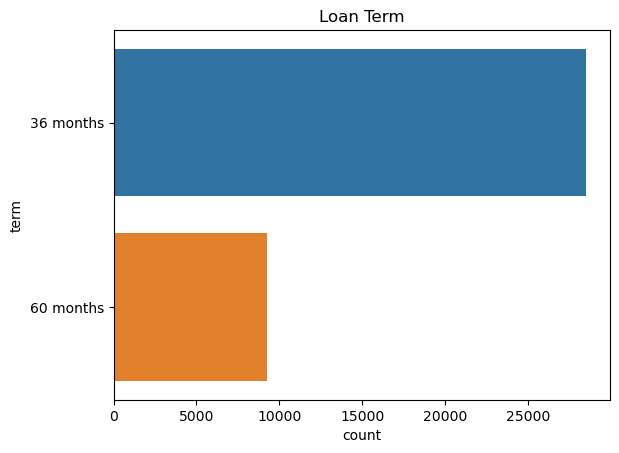

In [74]:
sns.countplot(data=loan_df, y='term')
plt.title('Loan Term')
plt.show()

**Findings:** Borrowers opted for a 36 month term 3 times more compared to the 60 month term. 1 in every 4 borrowers opted for the longer term.

### **Installment** *(The monthly payment owed by the borrower if the loan originates.)*

In [75]:
print("Installment median: {0:.2f}\n\n{1}".format(loan_df.installment.median(), loan_df.installment.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98])))

Installment median: 275.07

count    37751.000000
mean       317.954587
std        204.096719
min         15.690000
25%        164.860000
50%        275.070000
75%        417.615000
90%        607.870000
95%        735.940000
98%        860.420000
max       1305.190000
Name: installment, dtype: float64


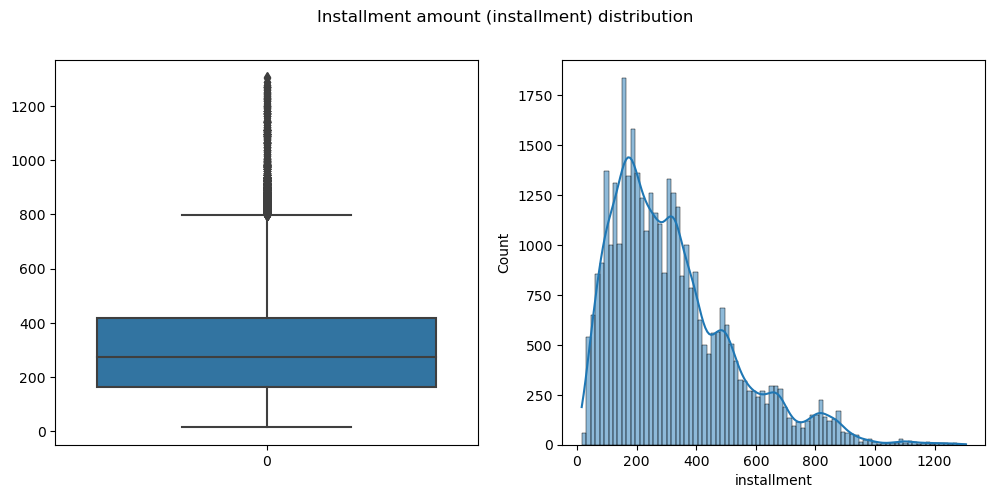

In [76]:
fig_size = (12,5)
data_to_plot = loan_df.installment
x_label = 'installment'
plot_title = 'Installment amount (installment) distribution'

plt.figure(figsize=fig_size)

# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=data_to_plot)

# Hist plot
plt.subplot(1,2,2)
sns.histplot(data=loan_df, x=x_label, kde=True)
plt.xlabel(xlabel=x_label)

plt.suptitle(plot_title)
plt.show()

**Findings:** The median installment is around 275 with the mean around 318. <br> 95% of borrowers had installment less than 750.

### **Annual Income** *(The self-reported annual income provided by the borrower during registration.)* <br> 

In [77]:
loan_df.annual_inc.describe()

count     37751.000000
mean      63903.956086
std       32263.103670
min        4000.000000
25%       40000.000000
50%       57600.000000
75%       80000.000000
max      186996.000000
Name: annual_inc, dtype: float64

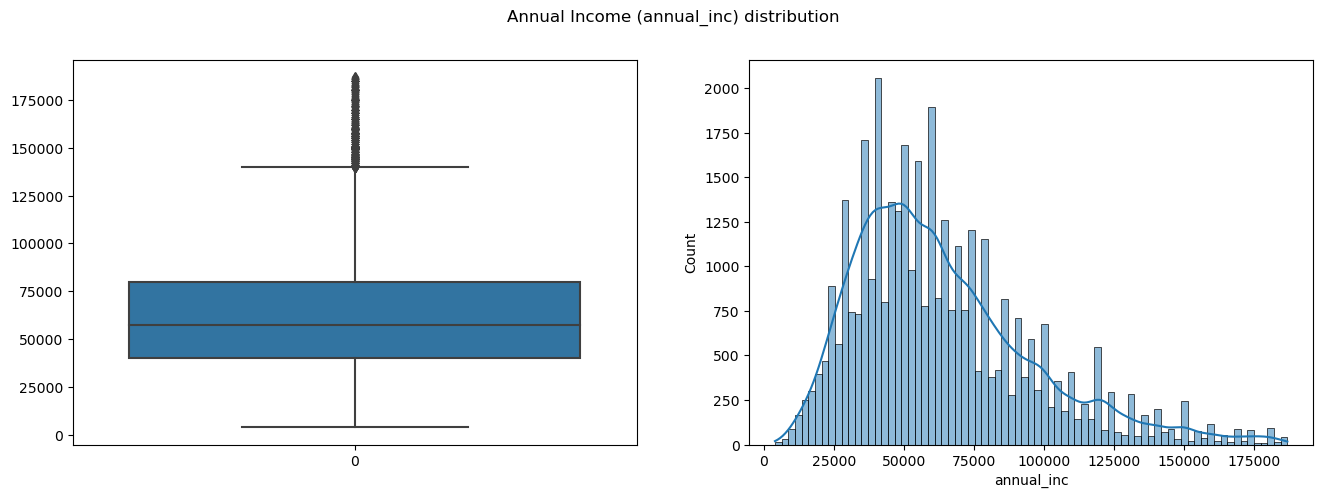

In [78]:
fig_size = (16,5)
data_to_plot = loan_df.annual_inc
x_label = 'annual_inc'
plot_title = 'Annual Income (annual_inc) distribution'

plt.figure(figsize=fig_size)

# Box plot
plt.subplot(1,2,1)
sns.boxplot(data=data_to_plot)

# Hist plot
plt.subplot(1,2,2)
sns.histplot(data=loan_df, x=x_label, kde=True)
plt.xlabel(xlabel=x_label)

plt.suptitle(plot_title)
plt.show()

**Findings:** Majority of the borrowers have annual income between 40k to 80k, with the median income around 57600. 

### **Grade Distribution** *(LC assigned loan grade)* 


In [79]:
loan_df.grade.value_counts().reset_index()

index  grade
0     B  11449
1     A   9901
2     C   7661
3     D   4961
4     E   2568
5     F    929
6     G    282

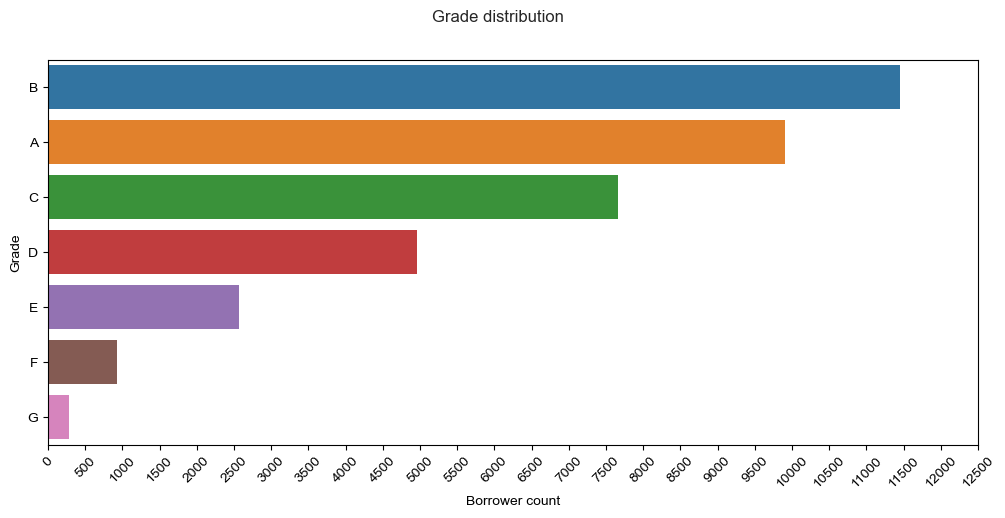

In [80]:
fig_size = (12,5)
data_to_plot = loan_df.grade.value_counts().reset_index()
y_label = 'Grade'
x_label = 'Borrower count'
plot_title = 'Grade distribution'

plt.figure(figsize=fig_size)

sns.barplot(data_to_plot, y='index', x='grade')
sns.set_style('darkgrid')
plt.ylabel(y_label)
plt.xlabel(x_label)
plt.xticks(np.arange(0,13000,500), rotation=45)
plt.suptitle(plot_title)
plt.show()

**Findings:** 'B' grade loan is the most common (~11500 borrowers), followed by 'A' (~10000 borrowers). With the least being 'G' (less than 500). 

### **Borrower Pincode and State** *(The Pincode & state provided by the borrower in the loan application)*

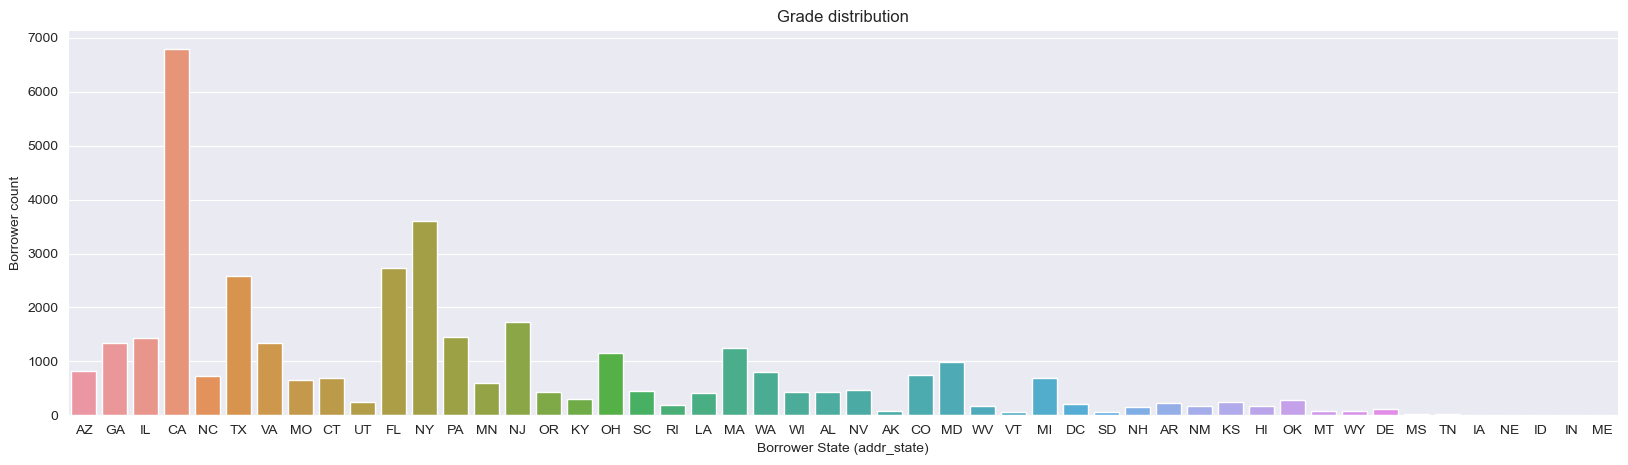

In [81]:
plt.figure(figsize=(20,5))
sns.countplot(data=loan_df, x='addr_state')
plt.xlabel(xlabel='Borrower State (addr_state)')
plt.ylabel(ylabel='Borrower count')
plt.title(plot_title)
plt.show()

**Findings:** 'CA' and 'NY' have the most borrowers, with 'FL' being the next.

### **Home ownership status** *(The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.)* 

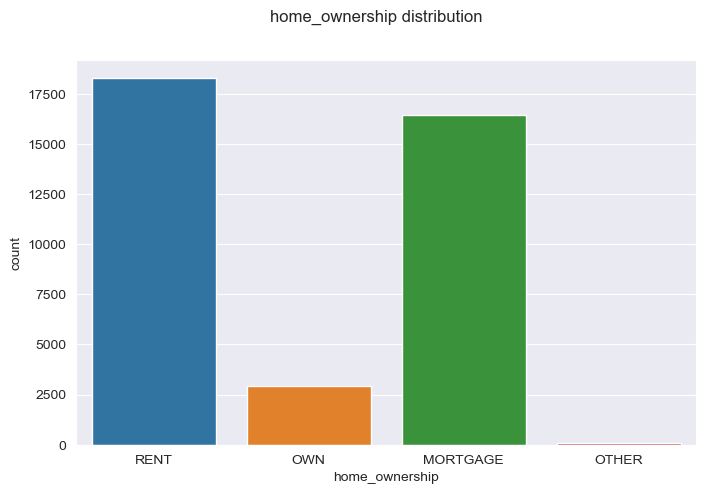

In [82]:
fig_size = (8,5)
data_to_plot = loan_df
x_label = 'home_ownership'
plot_title = 'home_ownership distribution'

plt.figure(figsize=fig_size)

# Box plot
#plt.subplot(1,2,1)
#sns.boxplot(data=data_to_plot)

# Hist plot
# plt.subplot(1,2,2)
sns.countplot(data=data_to_plot,x='home_ownership')

plt.xlabel(xlabel=x_label)

plt.suptitle(plot_title)
plt.show()

**Findings:** Most of the borrowers either have a mortgage or are living under rented housing.

### **Debt-to-Income** *(A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.)*

In [83]:
print("Median dti: {0} \n{1}".format(loan_df.dti.median(),loan_df.dti.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98])))

Median dti: 13.49 
count    37751.000000
mean        13.371425
std          6.656140
min          0.000000
25%          8.260000
50%         13.490000
75%         18.635000
90%         22.340000
95%         23.830000
98%         24.870000
max         29.990000
Name: dti, dtype: float64


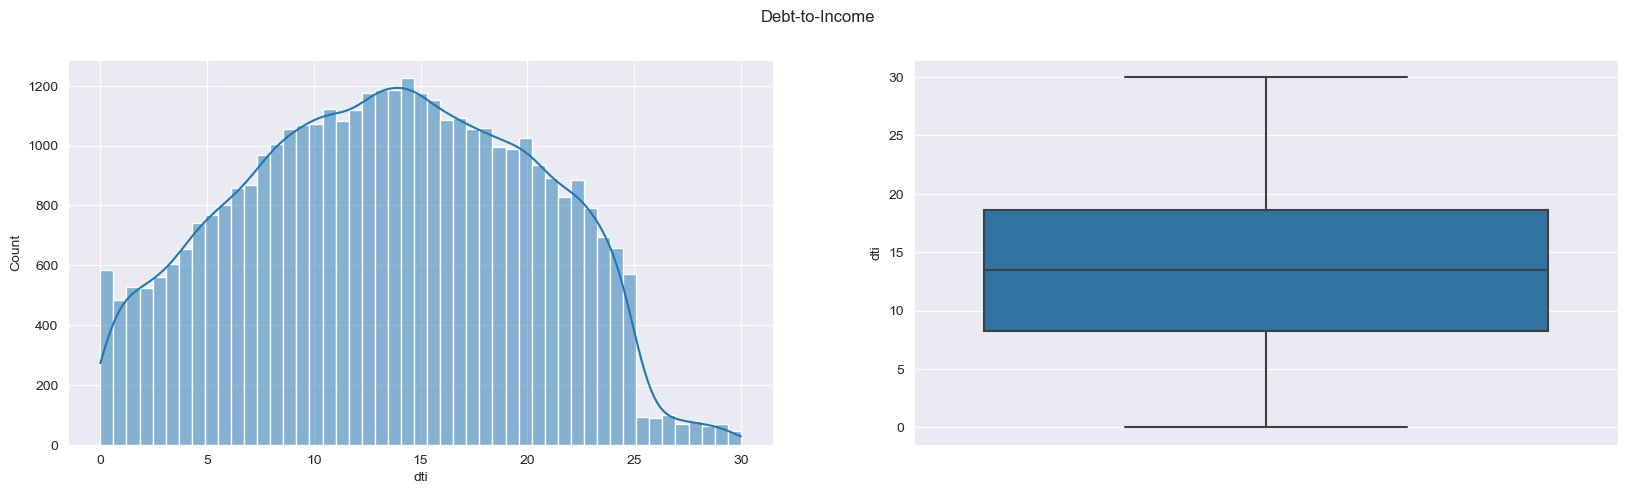

In [84]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(data=loan_df.dti, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df, y='dti')
plt.suptitle('Debt-to-Income')
plt.show()

**Findings**: Median DTI is about 13.49, a large portion of the borrowers have DTI between 8 and 18. Less than 2% of the borrowers have DTI beyond 25.

### **Loan Issue Year & Month** *(Derived columns from issue_d - The month which the loan was funded)*

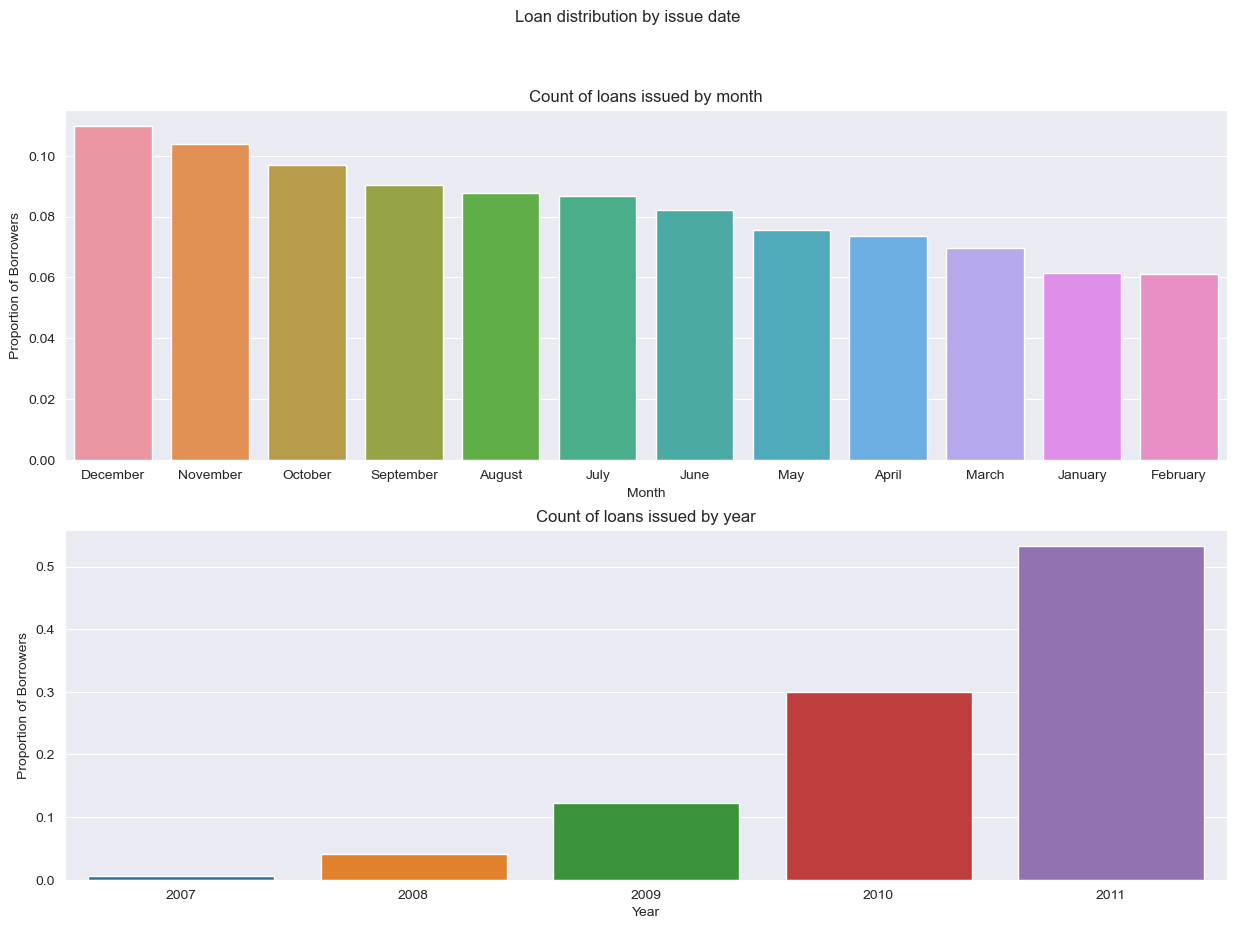

In [85]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
sns.barplot(data=loan_df.issue_d_month_name.value_counts(normalize=True).reset_index(),x='index', y='issue_d_month_name')
plt.xlabel('Month')
plt.ylabel('Proportion of Borrowers')
plt.title('Count of loans issued by month')

plt.subplot(2,1,2)
sns.barplot(data=loan_df.issue_d_year.value_counts(normalize=True).reset_index(), x='index', y='issue_d_year')
plt.xlabel('Year')
plt.ylabel('Proportion of Borrowers')
plt.title('Count of loans issued by year')
plt.suptitle('Loan distribution by issue date')
plt.show()

<Axes: xlabel='count', ylabel='issue_d_year'>

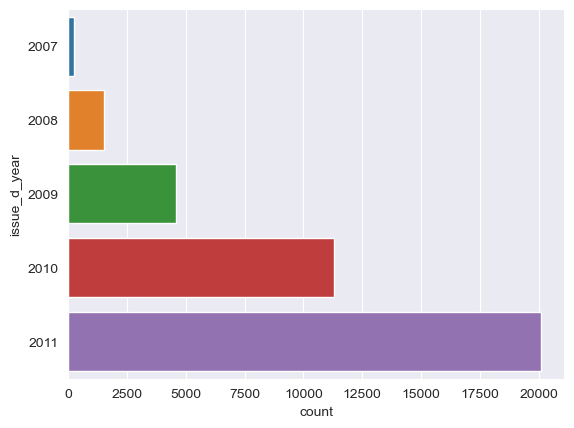

In [86]:
sns.countplot(loan_df, y='issue_d_year')

**Findings**: The lending club steadily grew from `2007` to `2011`, with more than 50% (~21000) of the borrowers having their loan issued during `2011`.
Across all the years, `December` had the most number of loans issued. 

### **Bankruptcies (pub_rec and pub_rec_bankruptcies)**

In [87]:
# Number of derogatory public records
print("Value Counts: \n{0}\n\nNormalized:\n{1}".format(loan_df.pub_rec.value_counts(), loan_df.pub_rec.value_counts(normalize=True)))

Value Counts: 
0    35703
1     1992
2       47
3        7
4        2
Name: pub_rec, dtype: int64

Normalized:
0    0.945750
1    0.052767
2    0.001245
3    0.000185
4    0.000053
Name: pub_rec, dtype: float64


In [88]:
# Number of public record bankruptcies
print("Value Counts: \n{0}\n\nNormalized:\n{1}".format(loan_df.pub_rec_bankruptcies.value_counts(), 
                                                       loan_df.pub_rec_bankruptcies.value_counts(normalize=True)))

Value Counts: 
0.0    36123
1.0     1623
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

Normalized:
0.0    0.956875
1.0    0.042992
2.0    0.000132
Name: pub_rec_bankruptcies, dtype: float64


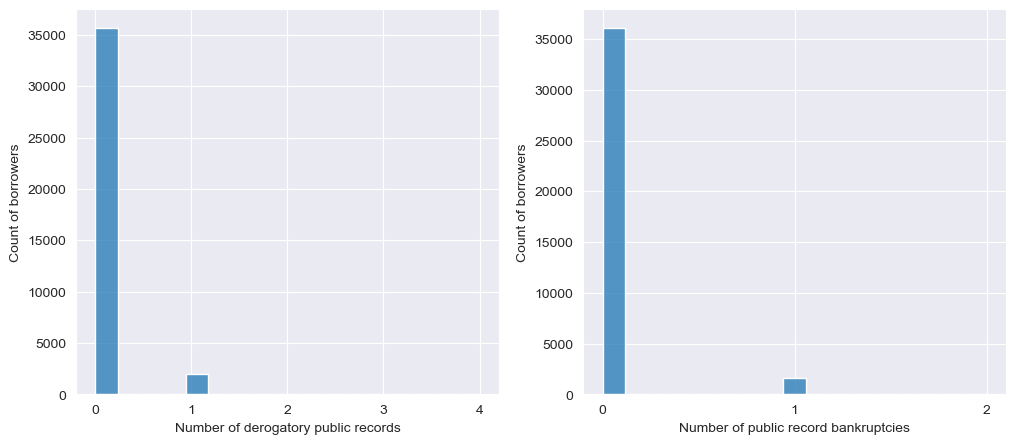

In [89]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data=loan_df, x='pub_rec')
plt.xticks(loan_df.pub_rec.unique())
plt.xlabel('Number of derogatory public records')
plt.ylabel('Count of borrowers')

plt.subplot(1,2,2)
sns.histplot(data=loan_df, x='pub_rec_bankruptcies')
plt.xticks(loan_df.pub_rec_bankruptcies.unique())
plt.xlabel('Number of public record bankruptcies')
plt.ylabel('Count of borrowers')
plt.show()


#### **Findings:** More than 94% of the borrowers don't have any pubic derogatory records against them. 

### **Earliest Credit Line (Year and Month)** *(The month the borrower's earliest reported credit line was opened)*

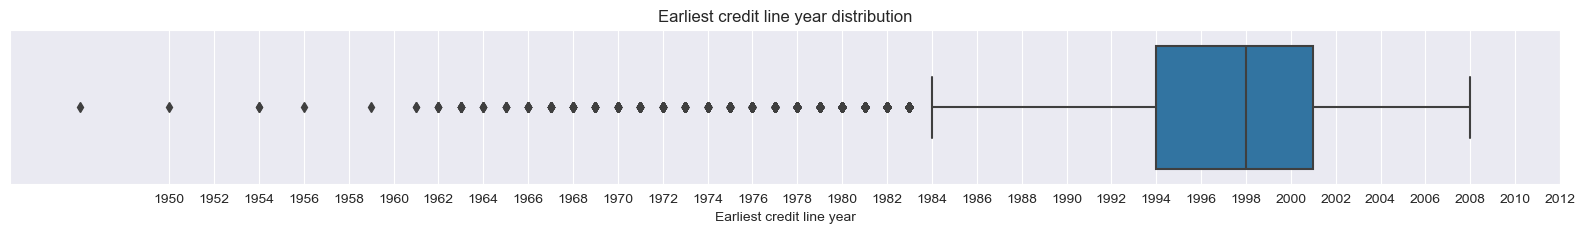

In [90]:
plt.figure(figsize=(20,2))
sns.boxplot(loan_df, x='earliest_cr_line_year')
plt.xticks(np.arange(1950,2014,2))
plt.xlabel('Earliest credit line year')
plt.title('Earliest credit line year distribution')
plt.show()

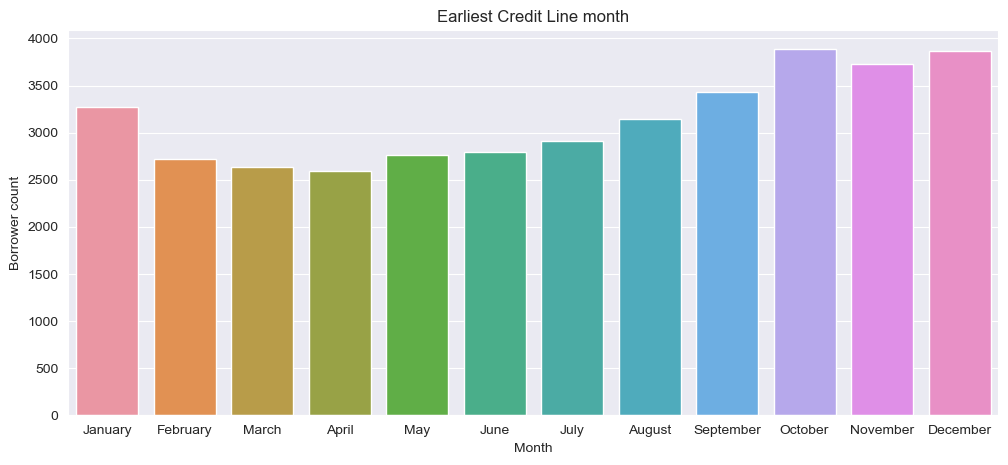

In [91]:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October', 'November', 'December']
plt.figure(figsize=(12,5))
sns.countplot(loan_df, x='earliest_cr_line_month_name', order=ordered_months)
plt.ylabel('Borrower count')
plt.xlabel('Month')
plt.title('Earliest Credit Line month')
plt.show()

**Findings:** Majority of the borrowers had their first credit line opened between 1994 and 2001. Most of them opened it during Oct-Dec.

## Segmented Univariate Analysis *(Analyzing Continuous data against categorical variables)*

### Installment <br> *(The monthly payment owed by the borrower if the loan originates.)*

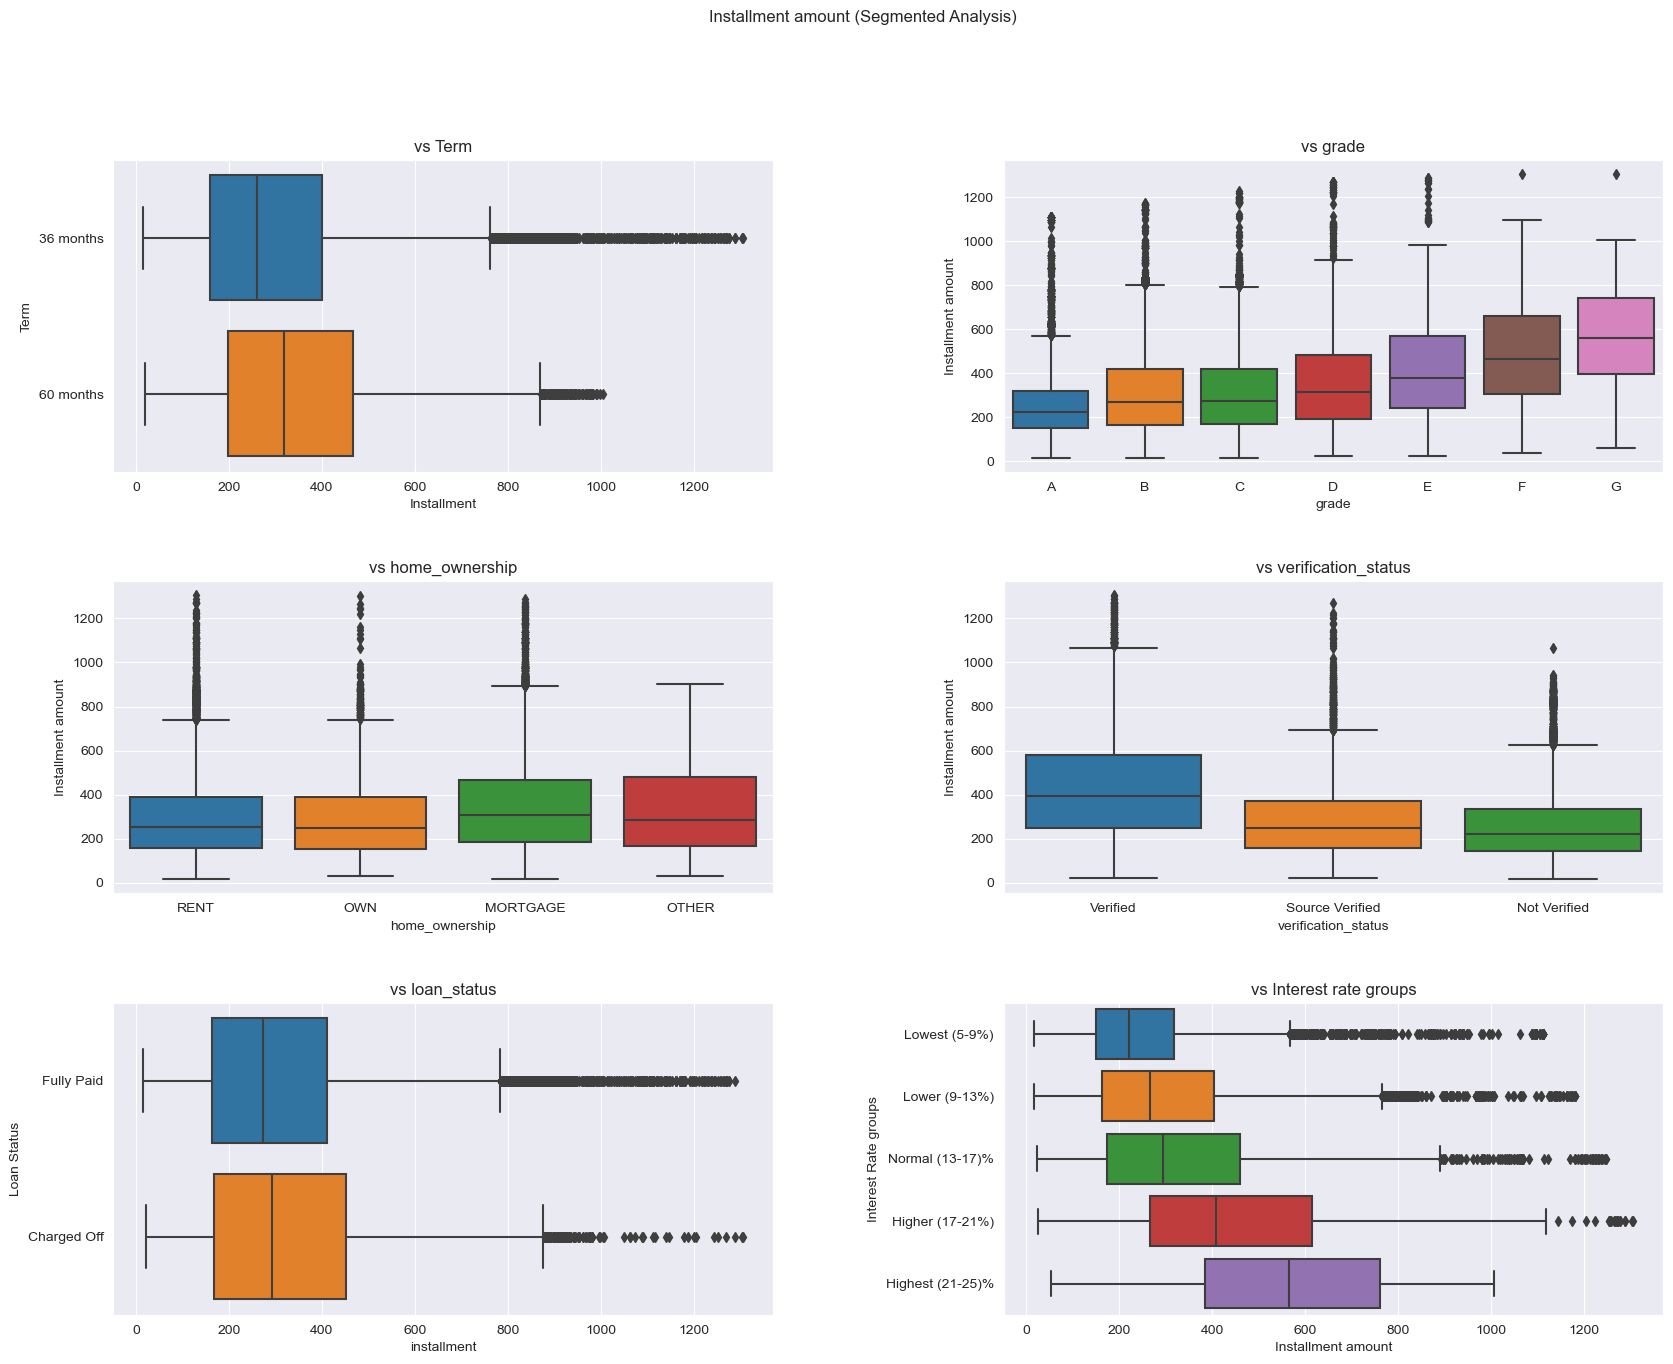

In [92]:
## Segmented by term and grade
fig_size = (20,15)
data_to_plot = loan_df;
plt.figure(figsize=fig_size)

# Subplot I - Installment amount by Term
plt.subplot(3,2,1)
sns.boxplot(data=data_to_plot, x='installment', y='term')
plt.xlabel('Installment')
plt.ylabel('Term')
plt.title('vs Term')

# Subplot II - Installment amount by grade (LC assigned loan grade)
plt.subplot(3,2,2)
ordered_grades = data_to_plot.grade.unique()
ordered_grades.sort();
sns.boxplot(data=data_to_plot, y='installment', x='grade', order=ordered_grades)
plt.ylabel('Installment amount')
plt.title('vs grade')

# Subplot III - Installment by home_ownership.
plt.subplot(3,2,3)
sns.boxplot(data=data_to_plot, y='installment', x='home_ownership')
plt.ylabel('Installment amount')
plt.title('vs home_ownership')

# Subplot IV - Installment by verification_status
plt.subplot(3,2,4)
sns.boxplot(data=data_to_plot, y='installment', x='verification_status')
plt.ylabel('Installment amount')
plt.title('vs verification_status')

# Subplot V - Installment by loan_status
plt.subplot(3,2,5)
sns.boxplot(data=data_to_plot, y='loan_status', x='installment')
plt.ylabel('Loan Status')
plt.title('vs loan_status')

# Subplot VI - Installment by int_rate_grp
plt.subplot(3,2,6)
sns.boxplot(data=data_to_plot, x='installment', y='int_rate_grp' )
plt.ylabel('Interest Rate groups')
plt.xlabel('Installment amount')
plt.title('vs Interest rate groups')
plt.subplots_adjust(wspace=0.35, hspace=0.35)
plt.suptitle('Installment amount (Segmented Analysis)')
plt.show()

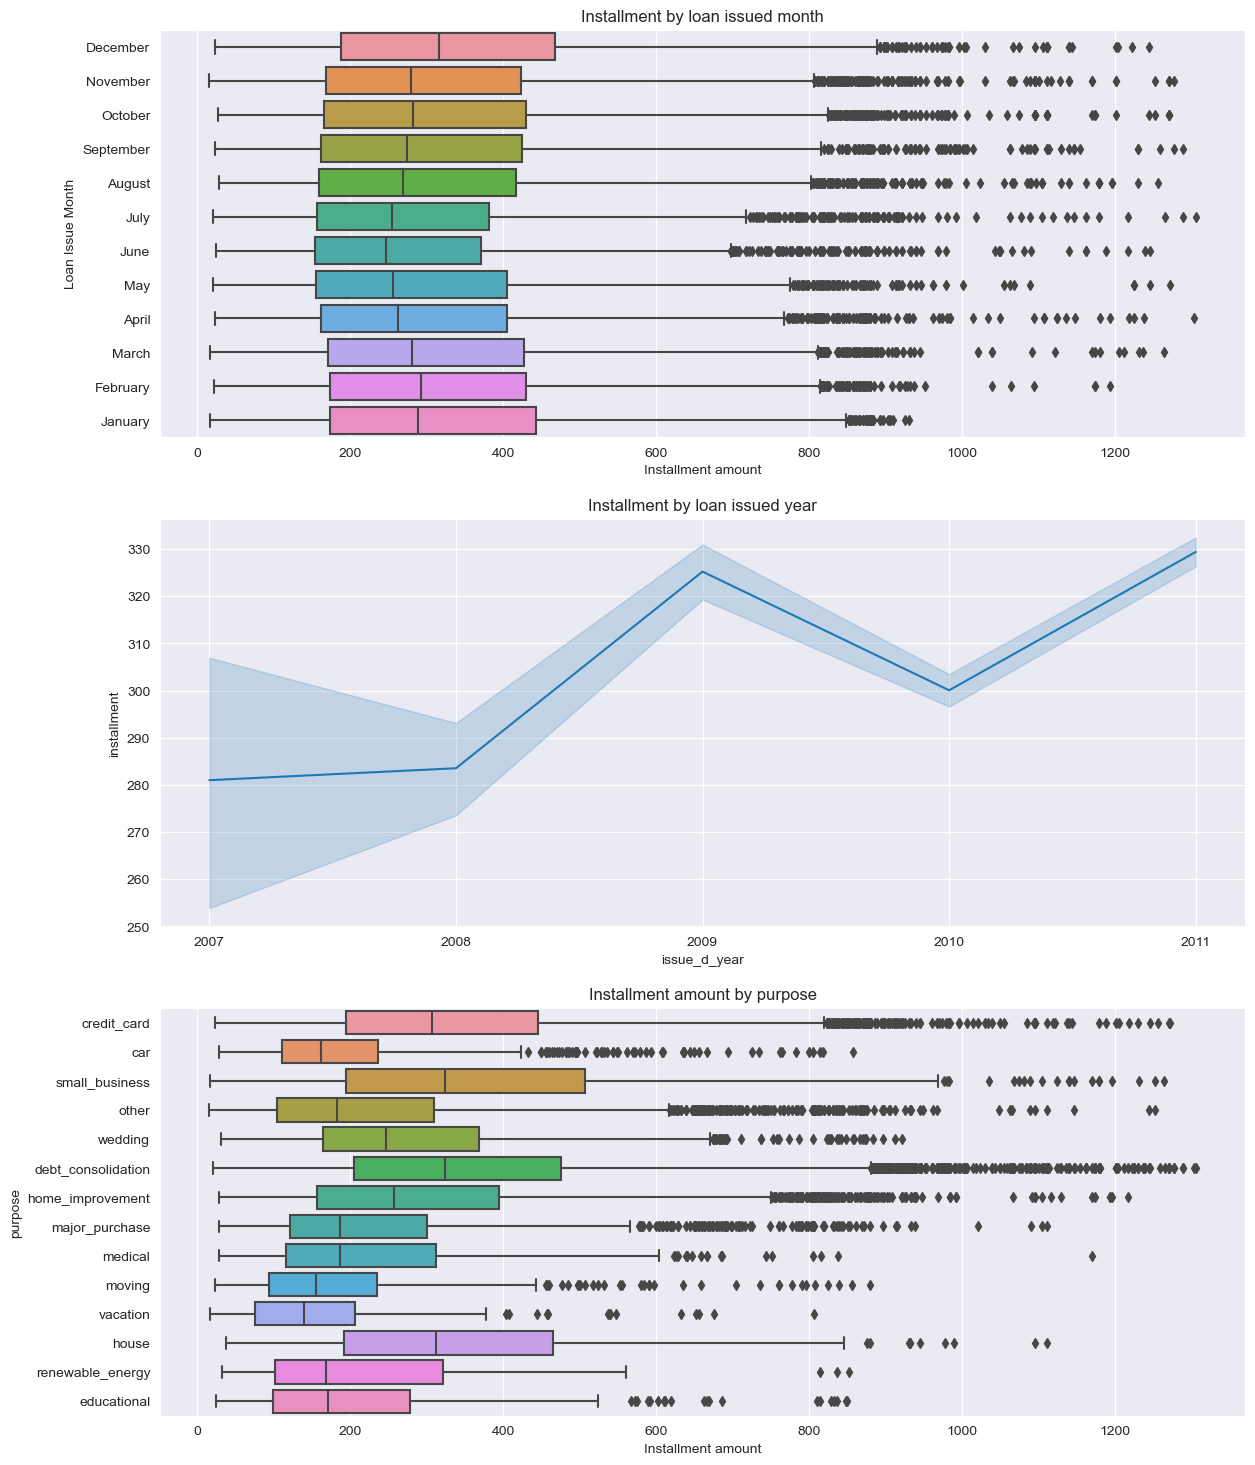

In [93]:
## Installment by loan issued month
plt.figure(figsize=(14,18))
plt.subplot(3,1,1)
sns.boxplot(loan_df, x='installment', y='issue_d_month_name')
plt.ylabel('Loan Issue Month')
plt.xlabel('Installment amount')
plt.title('Installment by loan issued month')

## Installment by loan issued year
plt.subplot(3,1,2)
sns.lineplot(data=loan_df, x='issue_d_year', y='installment')
plt.xticks(loan_df.issue_d_year.unique())
plt.title('Installment by loan issued year')

## Installment by loan purpose.
plt.subplot(3,1,3)
sns.boxplot(data=loan_df, y='purpose', x='installment')
plt.xlabel('Installment amount')
plt.ylabel('purpose')
plt.title('Installment amount by purpose')

plt.show()

In [94]:
loan_df.groupby(by='issue_d_year').installment.describe()

count        mean         std    min       25%      50%  \
issue_d_year                                                              
2007            238.0  281.006975  208.587083  15.69  133.8900  208.025   
2008           1529.0  283.537816  185.800205  16.08  158.5000  239.040   
2009           4598.0  325.235313  199.205858  31.06  168.1700  285.950   
2010          11298.0  300.072077  191.051246  19.87  156.8175  258.730   
2011          20088.0  329.403043  212.381012  21.25  170.0100  287.510   

                   75%      max  
issue_d_year                     
2007          380.3050   862.97  
2008          351.9200   897.06  
2009          448.2325   918.02  
2010          394.5800   945.35  
2011          433.8000  1305.19

##### Findings:

- **Term:** People who opted for `60 month` paid a higher median installment amount to the lending club. 
- **Grade:** Installment amount rose with `grade` of the loan.
- **Home Ownership:** Mortgage owners paid a higher installment amount compared to other borrowers.  
- **Verification status:** Borrowers who were `Verified` by the lending club paid a higher median installment amount compared to those who just had `source_verified`. Borrowers who were `Not Verified` had the least median installment amount.

- **Loan Status:** Borrowers who were `Charged Off` paid a slightly higher installment amount compared to borrowers who repaid the lending club fully.
- **Interest rate groups:** Higher interest rates meant higher installment amounts. 
- **Loan Issued month and year:** Over the years, December had the loans with highest median installment amounts. June had the least median installment amount. 
Loans issued in `2009` and `2011` had the highest installment amounts compared to other years. The installment amount has gradually increased over the years, with `2010` being an exception.

- **Purpose:** Loans issued for `debt_consolidation`, `small_business`, `house`, `credit_card` had the highest median installment amounts. `vacation`, `moving` and `car` had the least ,median installment amounts. 

### Loan Amount <br>*(The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.)*

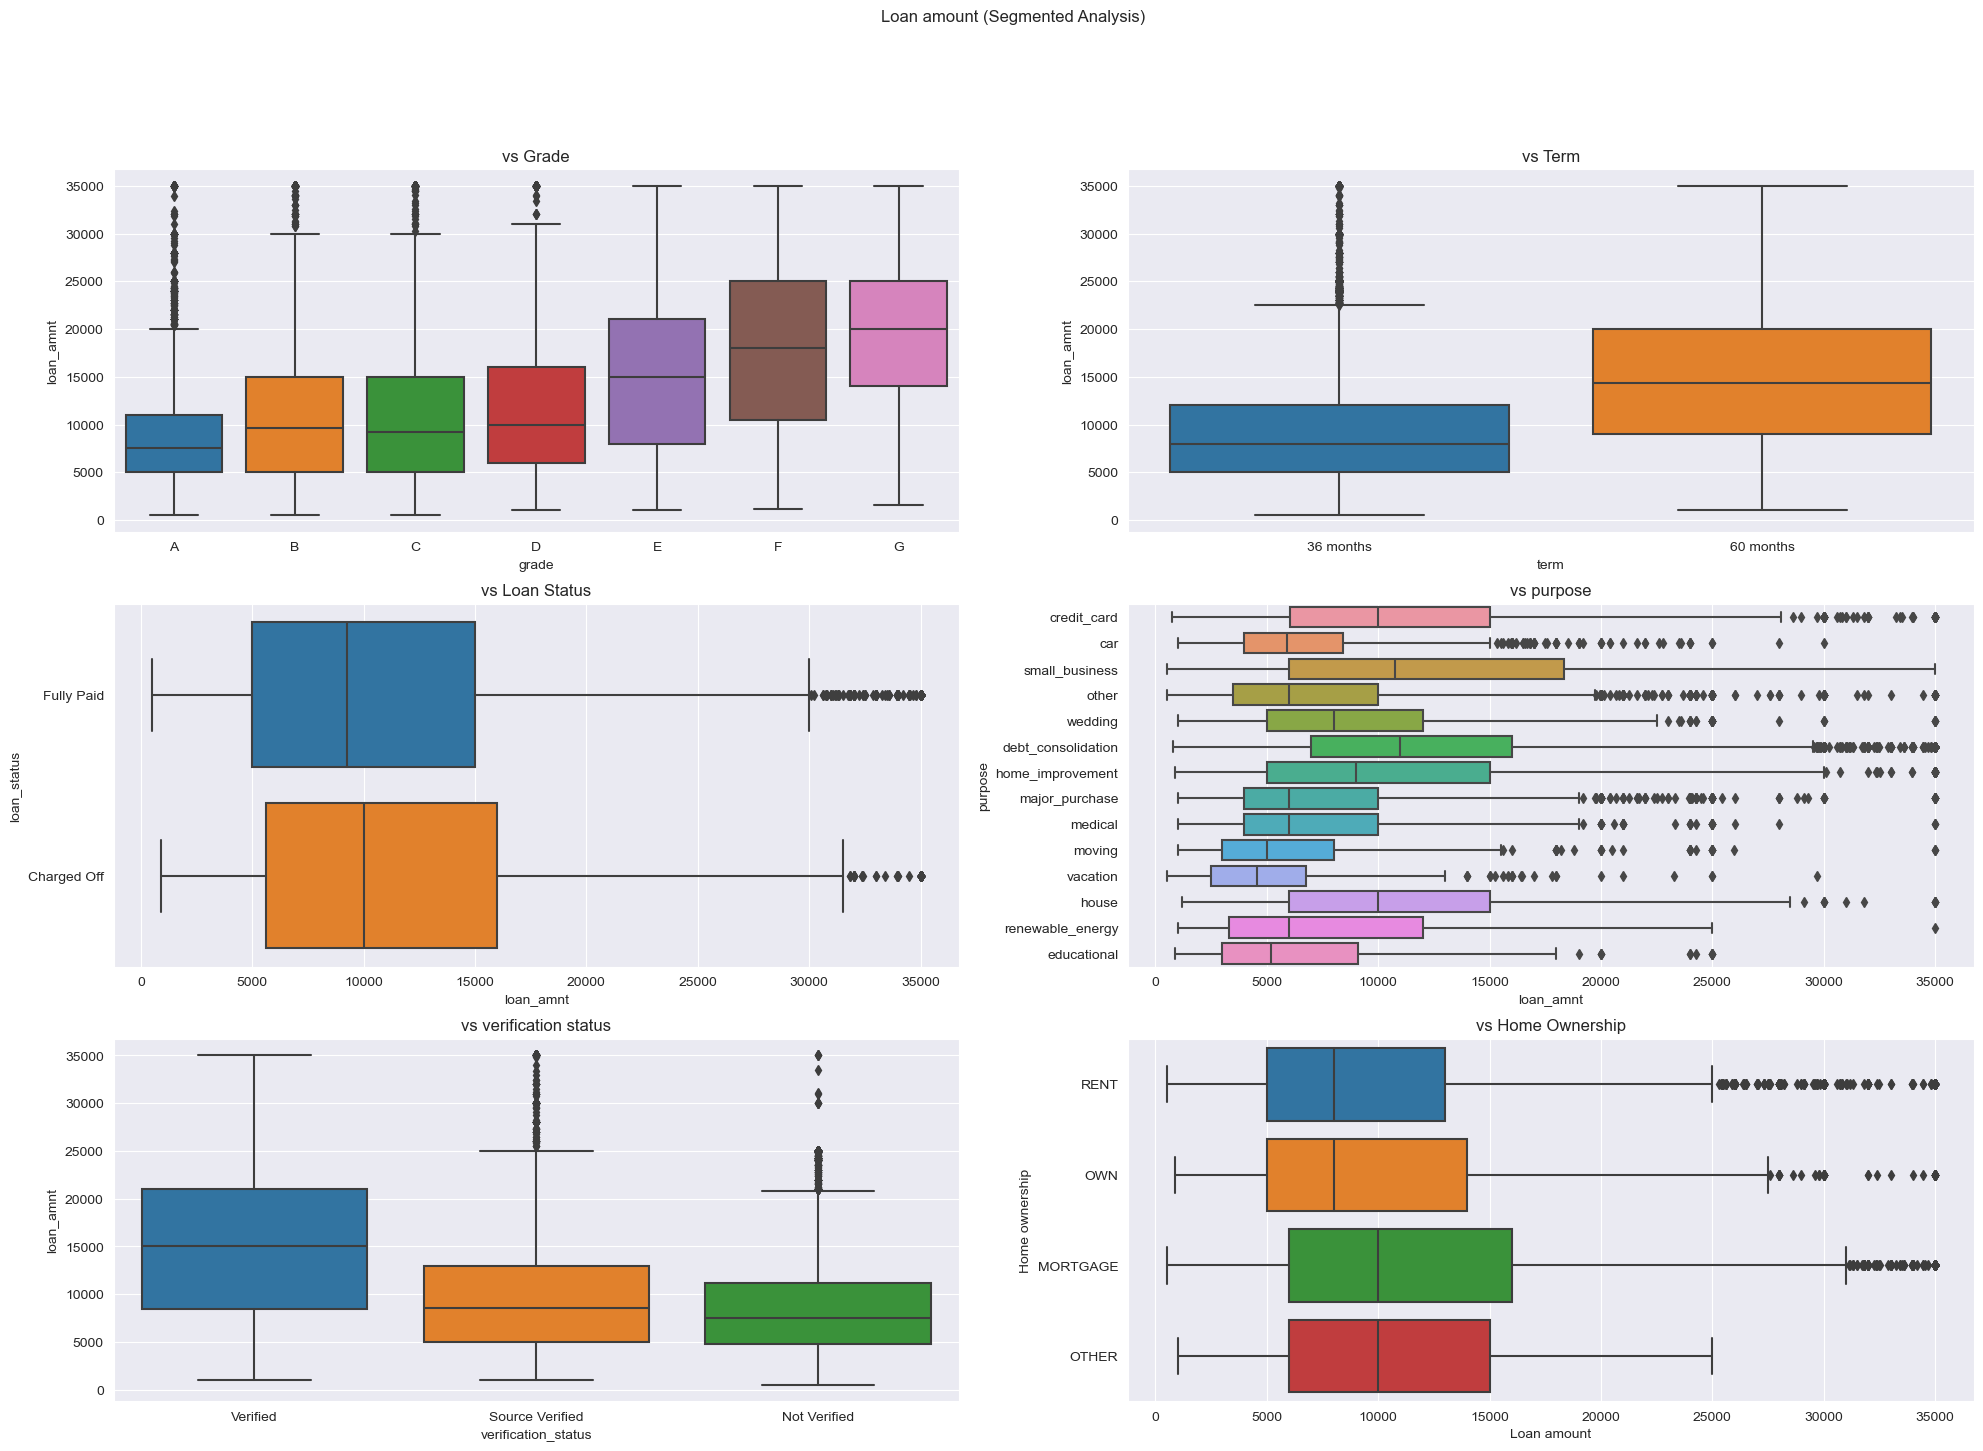

In [95]:
fig_size = (24,16)
data_to_plot = loan_df;
plt.figure(figsize=fig_size)

# subplot I - vs Grade
plt.subplot(3,2,1)
grades = loan_df.grade.unique()
grades.sort()
sns.boxplot(x='grade', y = data_to_plot.loan_amnt, data=loan_df, order=grades)
plt.title('vs Grade')

# Subplot II - vs Term
plt.subplot(3,2,2)
sns.boxplot(x='term', y=data_to_plot.loan_amnt, data=data_to_plot)
plt.title('vs Term')

#Subplot III - vs Loan Status
plt.subplot(3,2,3)
sns.boxplot(data=data_to_plot, y='loan_status', x='loan_amnt')
plt.title('vs Loan Status')

#Subplot IV - vs Purpose
plt.subplot(3,2,4)
sns.boxplot(data=data_to_plot, y='purpose', x='loan_amnt')
plt.title('vs purpose')

#Subplot V - vs Verification Status
plt.subplot(3,2,5)
sns.boxplot(data=data_to_plot, x='verification_status', y='loan_amnt')
plt.title('vs verification status')

#Subplot VI - vs Home Ownership
plt.subplot(3,2,6)
sns.boxplot(data=data_to_plot, x='loan_amnt', y='home_ownership')
plt.ylabel('Home ownership')
plt.xlabel('Loan amount')
plt.title('vs Home Ownership')

plt.suptitle('Loan amount (Segmented Analysis)')
plt.show()


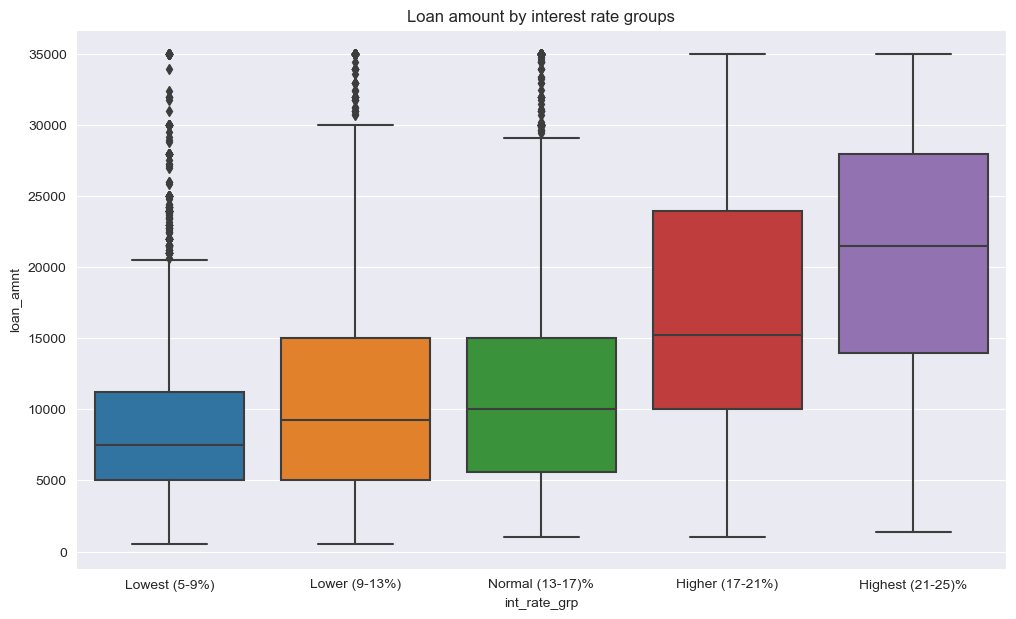

In [96]:
plt.figure(figsize=(12,7))
sns.boxplot(data=data_to_plot, x='int_rate_grp', y='loan_amnt')
plt.title('Loan amount by interest rate groups')
plt.show()

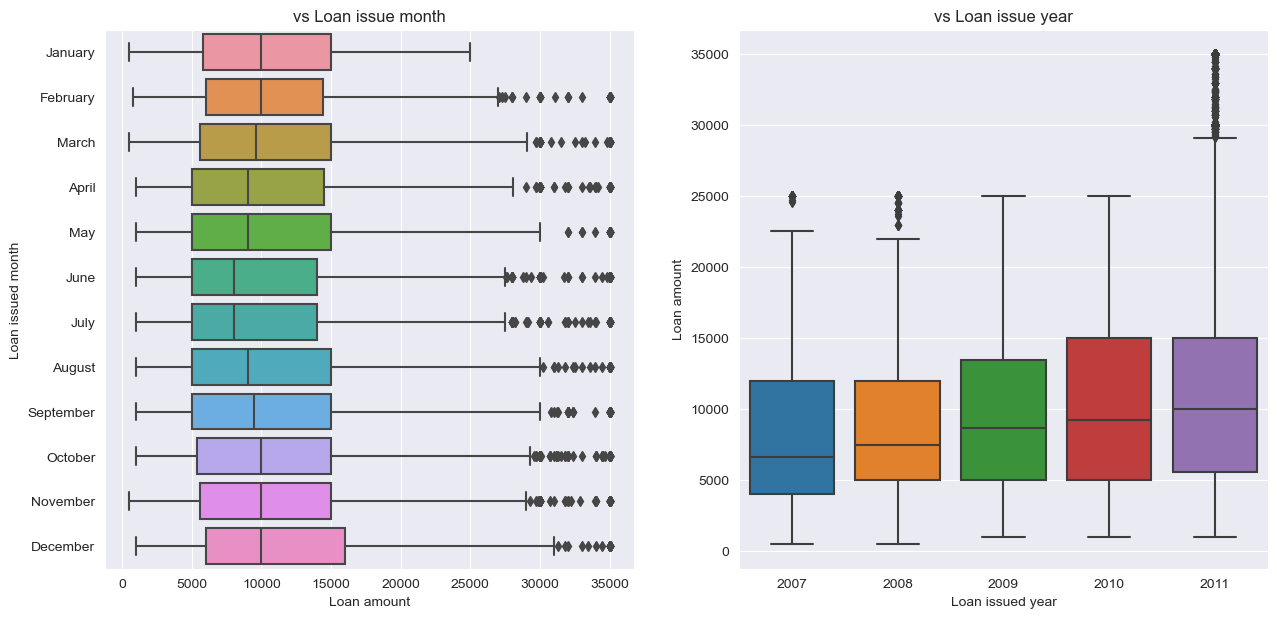

In [97]:
# Issue_d month and year.
plt.figure(figsize=(15,7))

ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September','October', 'November', 'December']
plt.subplot(1,2,1)
sns.boxplot(data=data_to_plot, y='issue_d_month_name', x='loan_amnt', order=ordered_months)
plt.ylabel('Loan issued month')
plt.xlabel('Loan amount')
plt.title('vs Loan issue month')


plt.subplot(1,2,2)
sns.boxplot(data=data_to_plot, x='issue_d_year', y='loan_amnt')
plt.ylabel('Loan amount')
plt.xlabel('Loan issued year')
plt.title('vs Loan issue year')

plt.show()


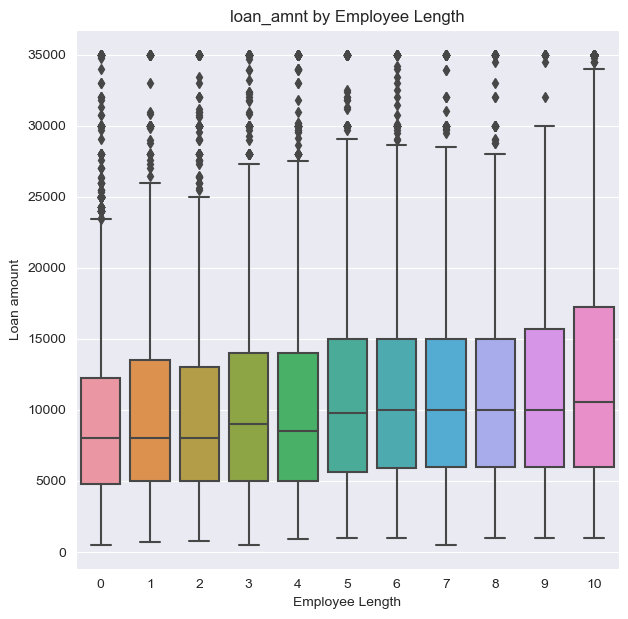

In [98]:
# Emp_length
plt.figure(figsize=(7,7))

sns.boxplot(data=data_to_plot, x='emp_length', y='loan_amnt')
plt.ylabel('Loan amount')
plt.xlabel('Employee Length')
plt.title('loan_amnt by Employee Length')
plt.show()

**Findings**: 
- **Grade:** `loan_amnt` increases with the `grade` assigned to the loan. 
- **Term:** `loan_amnt` was higher for a term of `60 month` when compared to `36 month` term.
- **Interest rate groups:** `loan_amnt` increases as move to higher interest rate groups.
- **Loan Status:** Defaulters were borrowing slightly higher `loan_amnt` compared to those who repaid their loan.
- **Purpose:** `debt_consolidation` purpose had the highest loan amount median (`11k`), followed closely by `small_business`. On the other hand, `vacation` had the lowest median for `loan_amnt`, with the next highest purpose being `moving`.
- **Verification Status:** Borrowers who were `verified` were approved for a highest median `loan_amnt`. With just `Source Verified` coming in next and `Not Verified` at the bottom. 
- **Home ownership**: Borrowers who specified `OTHER` or `MORTGAGE` had a higher median loan amount compared to people living in their own homes or in rented accomodation.
- **Issue year:** The median `loan_amnt` has increased going from `2008` to `2011`. There are a lot of outliers in `loan_amnt` during `2011`.
- **Issue month:** June and July borrowers opted for the least `loan_amnt` while October to December & February had highest median `loan_amnt` of `10k`.
- **Employee Length:** Regardless of emp_length, the loan_amnt doesn't vary much.

### Interest Rate <br> *(Interest Rate on the loan)*

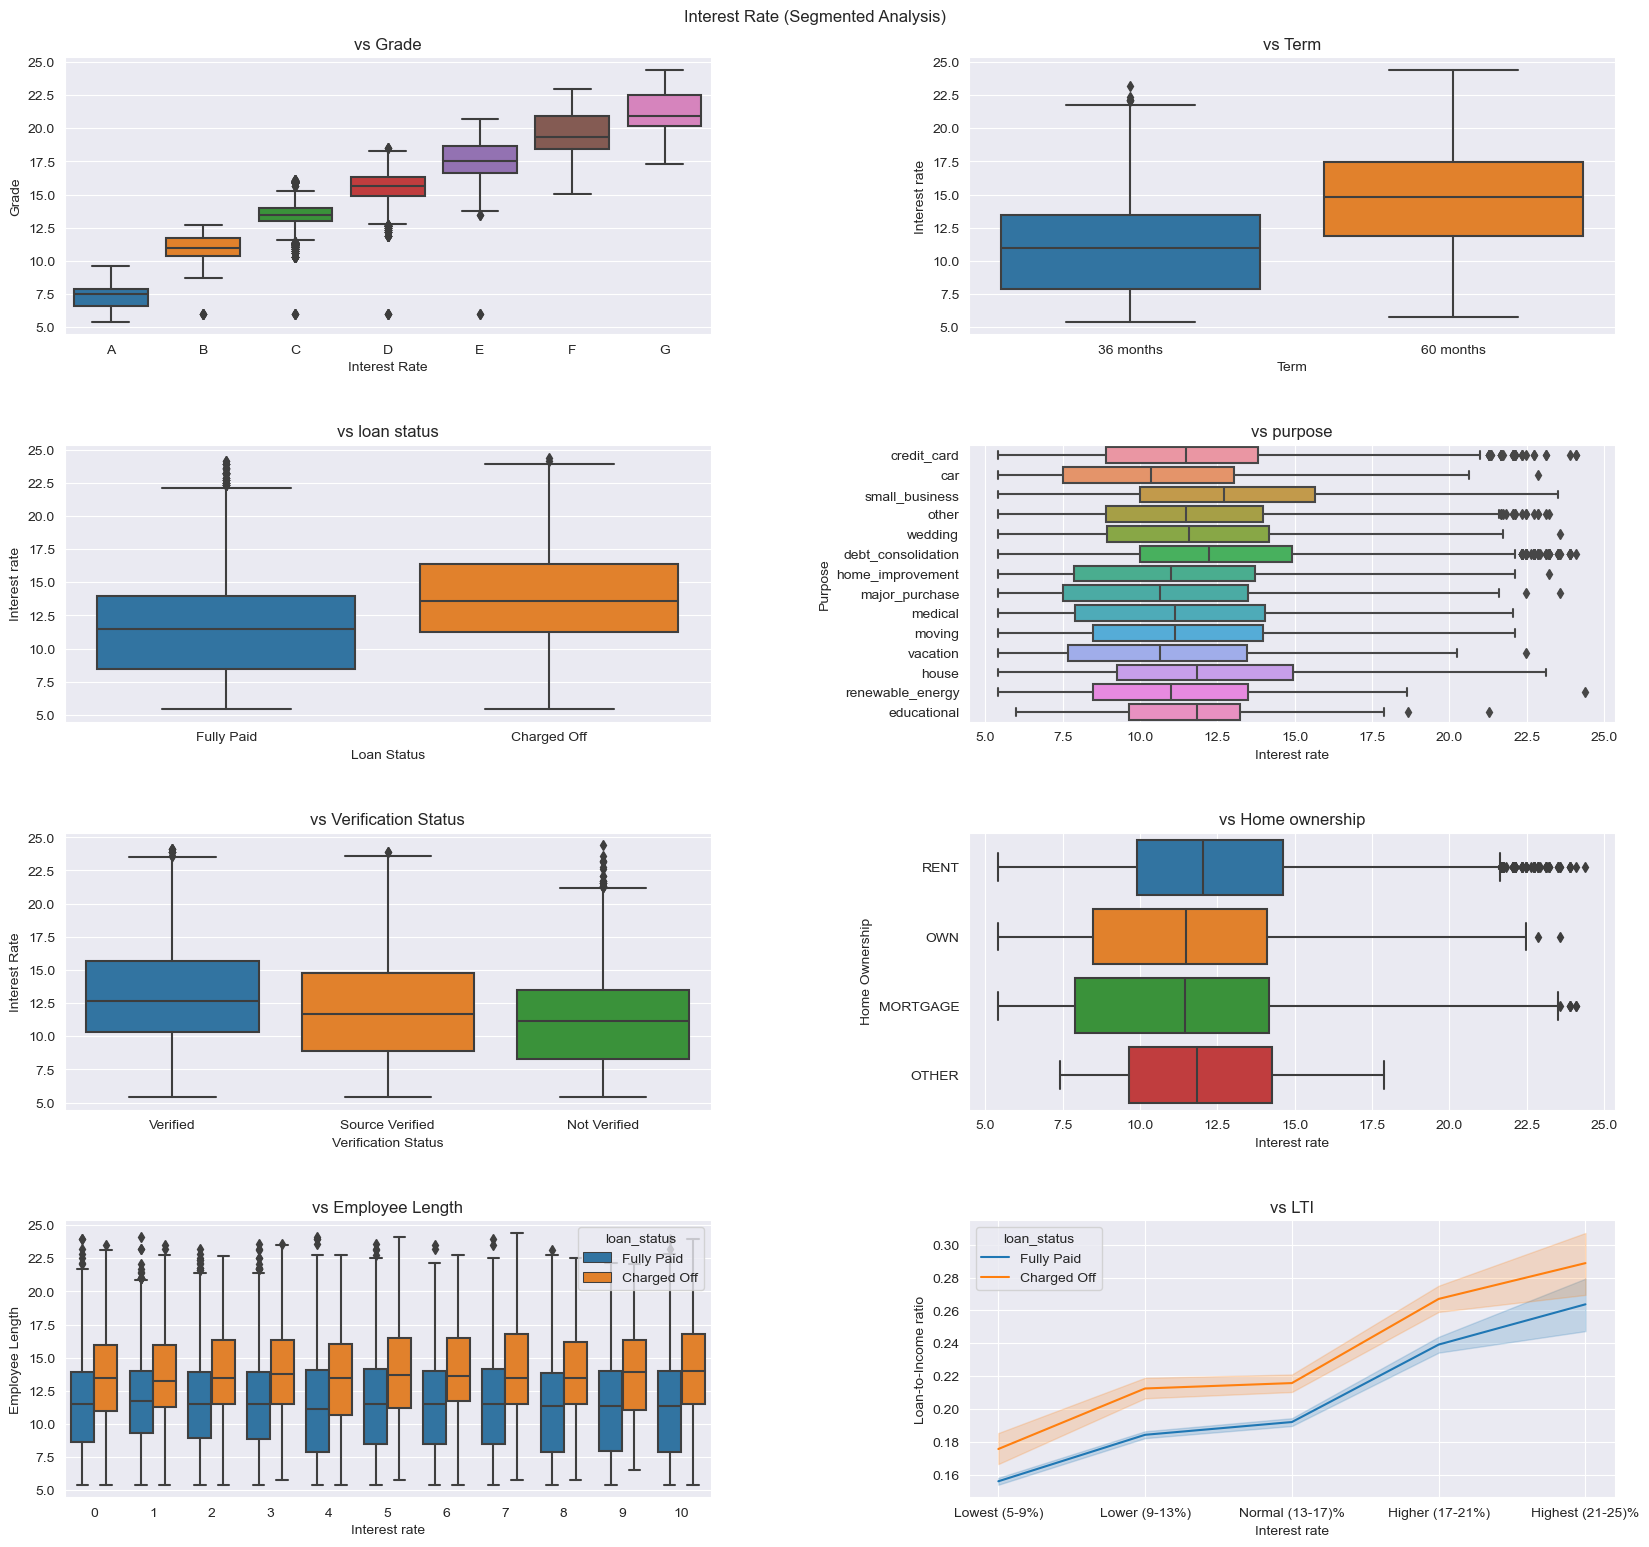

In [99]:
plt.figure(figsize=(20,16))
data_to_plot = loan_df

## Positioning subplots to prevent labels/figures from overlapping. 
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.95, bottom=0.05)

# Subplot I - vs Grade
plt.subplot(4,2,1)
grades = loan_df.grade.unique()
grades.sort()
sns.boxplot(data=data_to_plot, x='grade', y='int_rate', order=grades)
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('vs Grade')

# Subplot II - vs Term
plt.subplot(4,2,2)
sns.boxplot(data=data_to_plot, y = 'int_rate', x='term')
plt.xlabel('Term')
plt.ylabel('Interest rate')
plt.title('vs Term')

# Subplot III - vs Loan Status
plt.subplot(4,2,3)
sns.boxplot(data=data_to_plot, x='loan_status', y='int_rate')
plt.xlabel('Loan Status')
plt.ylabel('Interest rate')
plt.title('vs loan status')

#Subplot IV - vs Purpose
plt.subplot(4,2,4)
sns.boxplot(data=data_to_plot, y='purpose', x='int_rate')
plt.xlabel('Interest rate')
plt.ylabel('Purpose')
plt.title('vs purpose')

# Subplot V - vs Verification Status
plt.subplot(4,2,5)
sns.boxplot(data=data_to_plot, y='int_rate', x='verification_status')
plt.xlabel('Verification Status')
plt.ylabel('Interest Rate')
plt.title('vs Verification Status')

# Subplot VI - vs home_ownership
plt.subplot(4,2,6)
sns.boxplot(data=data_to_plot, x='int_rate', y='home_ownership')
plt.ylabel('Home Ownership')
plt.xlabel('Interest rate')
plt.title('vs Home ownership')

# Subplot VII - vs emp_length
plt.subplot(4,2,7)
sns.boxplot(data=data_to_plot, y='int_rate', x='emp_length', hue='loan_status')
plt.ylabel('Employee Length')
plt.xlabel('Interest rate')
plt.title('vs Employee Length')

# Subplot VIII - vs loan-to-income ratio
plt.subplot(4,2,8)
sns.lineplot(data=data_to_plot, x='int_rate_grp', y='loan_to_income', hue='loan_status')
plt.ylabel('Loan-to-Income ratio')
plt.xlabel('Interest rate')
plt.title('vs LTI')

plt.suptitle('Interest Rate (Segmented Analysis)')
plt.show();

In [100]:
loan_df.groupby(by='home_ownership').int_rate.median()

home_ownership
MORTGAGE    11.46
OTHER       11.83
OWN         11.49
RENT        12.04
Name: int_rate, dtype: float64

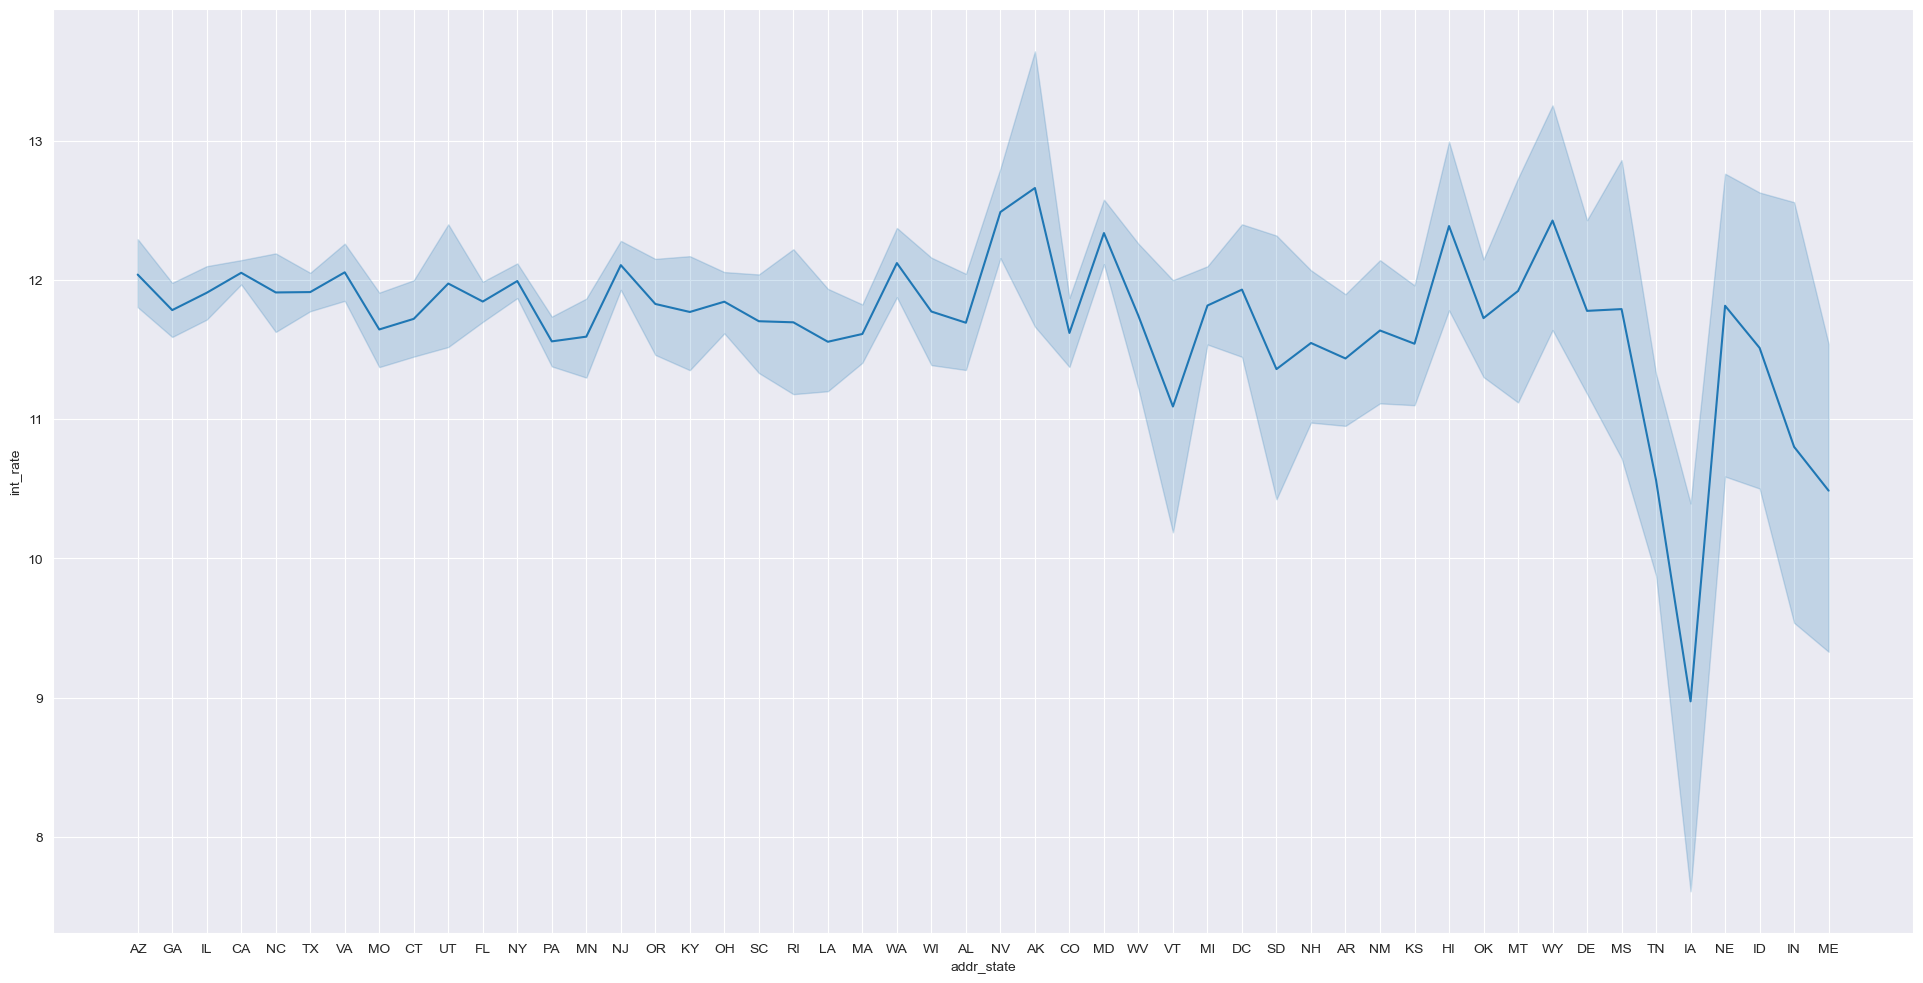

In [101]:
## Interest by borrower's state
plt.figure(figsize=(24,12))

# Add grid to this for readability. 
sns.set_style('darkgrid')
sns.lineplot(data=data_to_plot, y='int_rate', x='addr_state')
sns.set_style('ticks')
plt.show()

<Axes: xlabel='issue_d_year', ylabel='int_rate'>

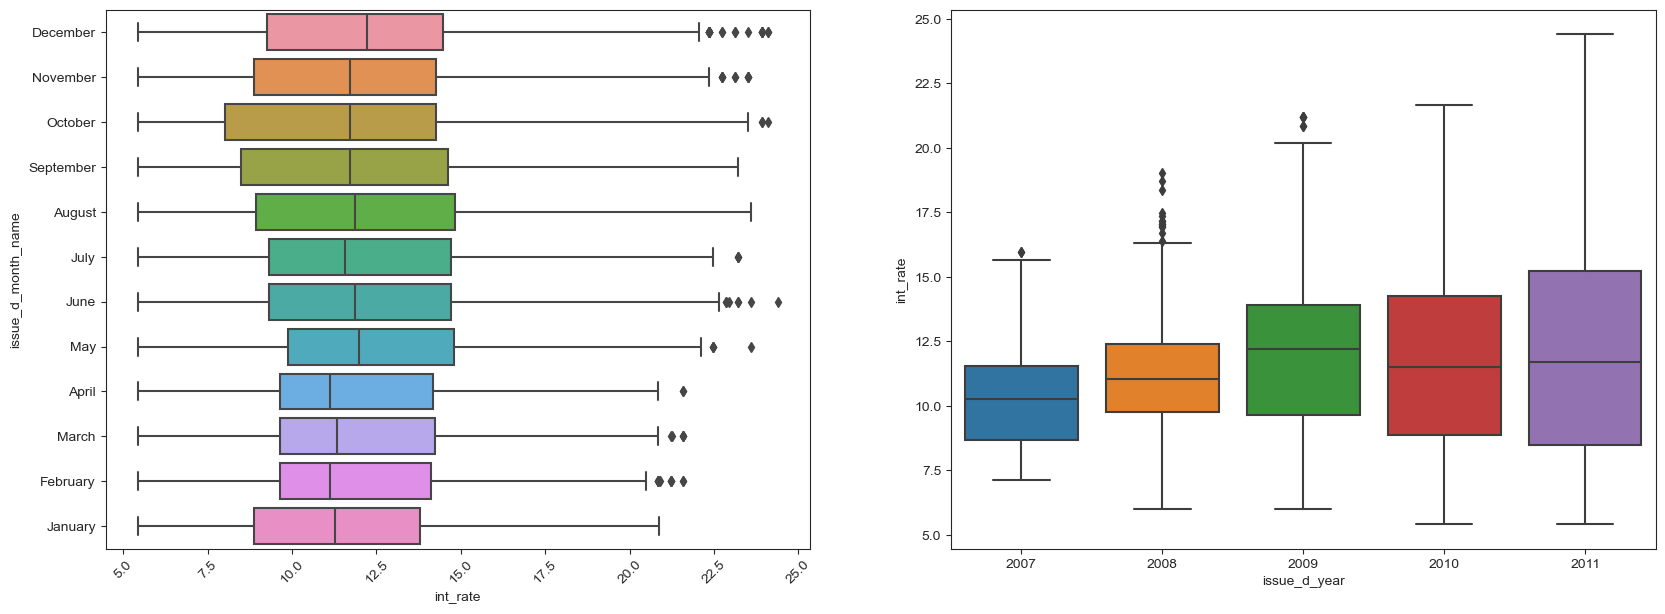

In [102]:
# Variance by issue month and issue year.
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.boxplot(data=loan_df, x='int_rate', y='issue_d_month_name')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=loan_df, y='int_rate', x='issue_d_year')

In [103]:
loan_df.groupby(by='term').int_rate.median()

term
36 months    10.99
60 months    14.83
Name: int_rate, dtype: float64

**Findings:**
- **Grade:** Higher grade meant higher interest rate.
- **Term:** 60 month term had higher median interest compared to 36 months term.  (`14.63%` (60 months) compared to `10.99%` (36 months))
- **Loan Status:** Defaulters were paying a slightly higher interest rate compared to others.
- **Purpose:** `small_business` had the highest median interest rate of 12.73% followed closely by `debt_consolidation`. While the least interest rate was offered for `car`, with the next highest being `vacation`.
- **Verification status:** Verified customers paid highest loan interest compared to those who just had `source verified` or who were `Not verified`.
- **Home ownership:** Borrowers who specified `OTHER` in `home_ownership` have the highest median interest rate (`11.83%`). There is very less variance in the median interest rate when segmented by home ownership. 

- **Borrower's state:** `IA` offered the lowest interest on average at 8.97%, while `AK` was the highest at 12.65%.
- **Issue month and year:** On average, the highest interest rates were around December (12.5%) while the lowest in April (11%). The variance of interest rate increased in 2011. 2009 had the highest median interest rate, while 2007 had the lowest median interest rate.
- **Employee Length** - No obvious pattern.

- **Loan-to-Income ratio** - Defaulters had a higher interest rate and also a higher loan to Income ratio. The loan to income ratio increased as we went from the lowest bucket to the highest bucket of the interest rate.

### Annual Income <br> *(The self-reported annual income provided by the borrower during registration.)*

<Figure size 640x480 with 0 Axes>

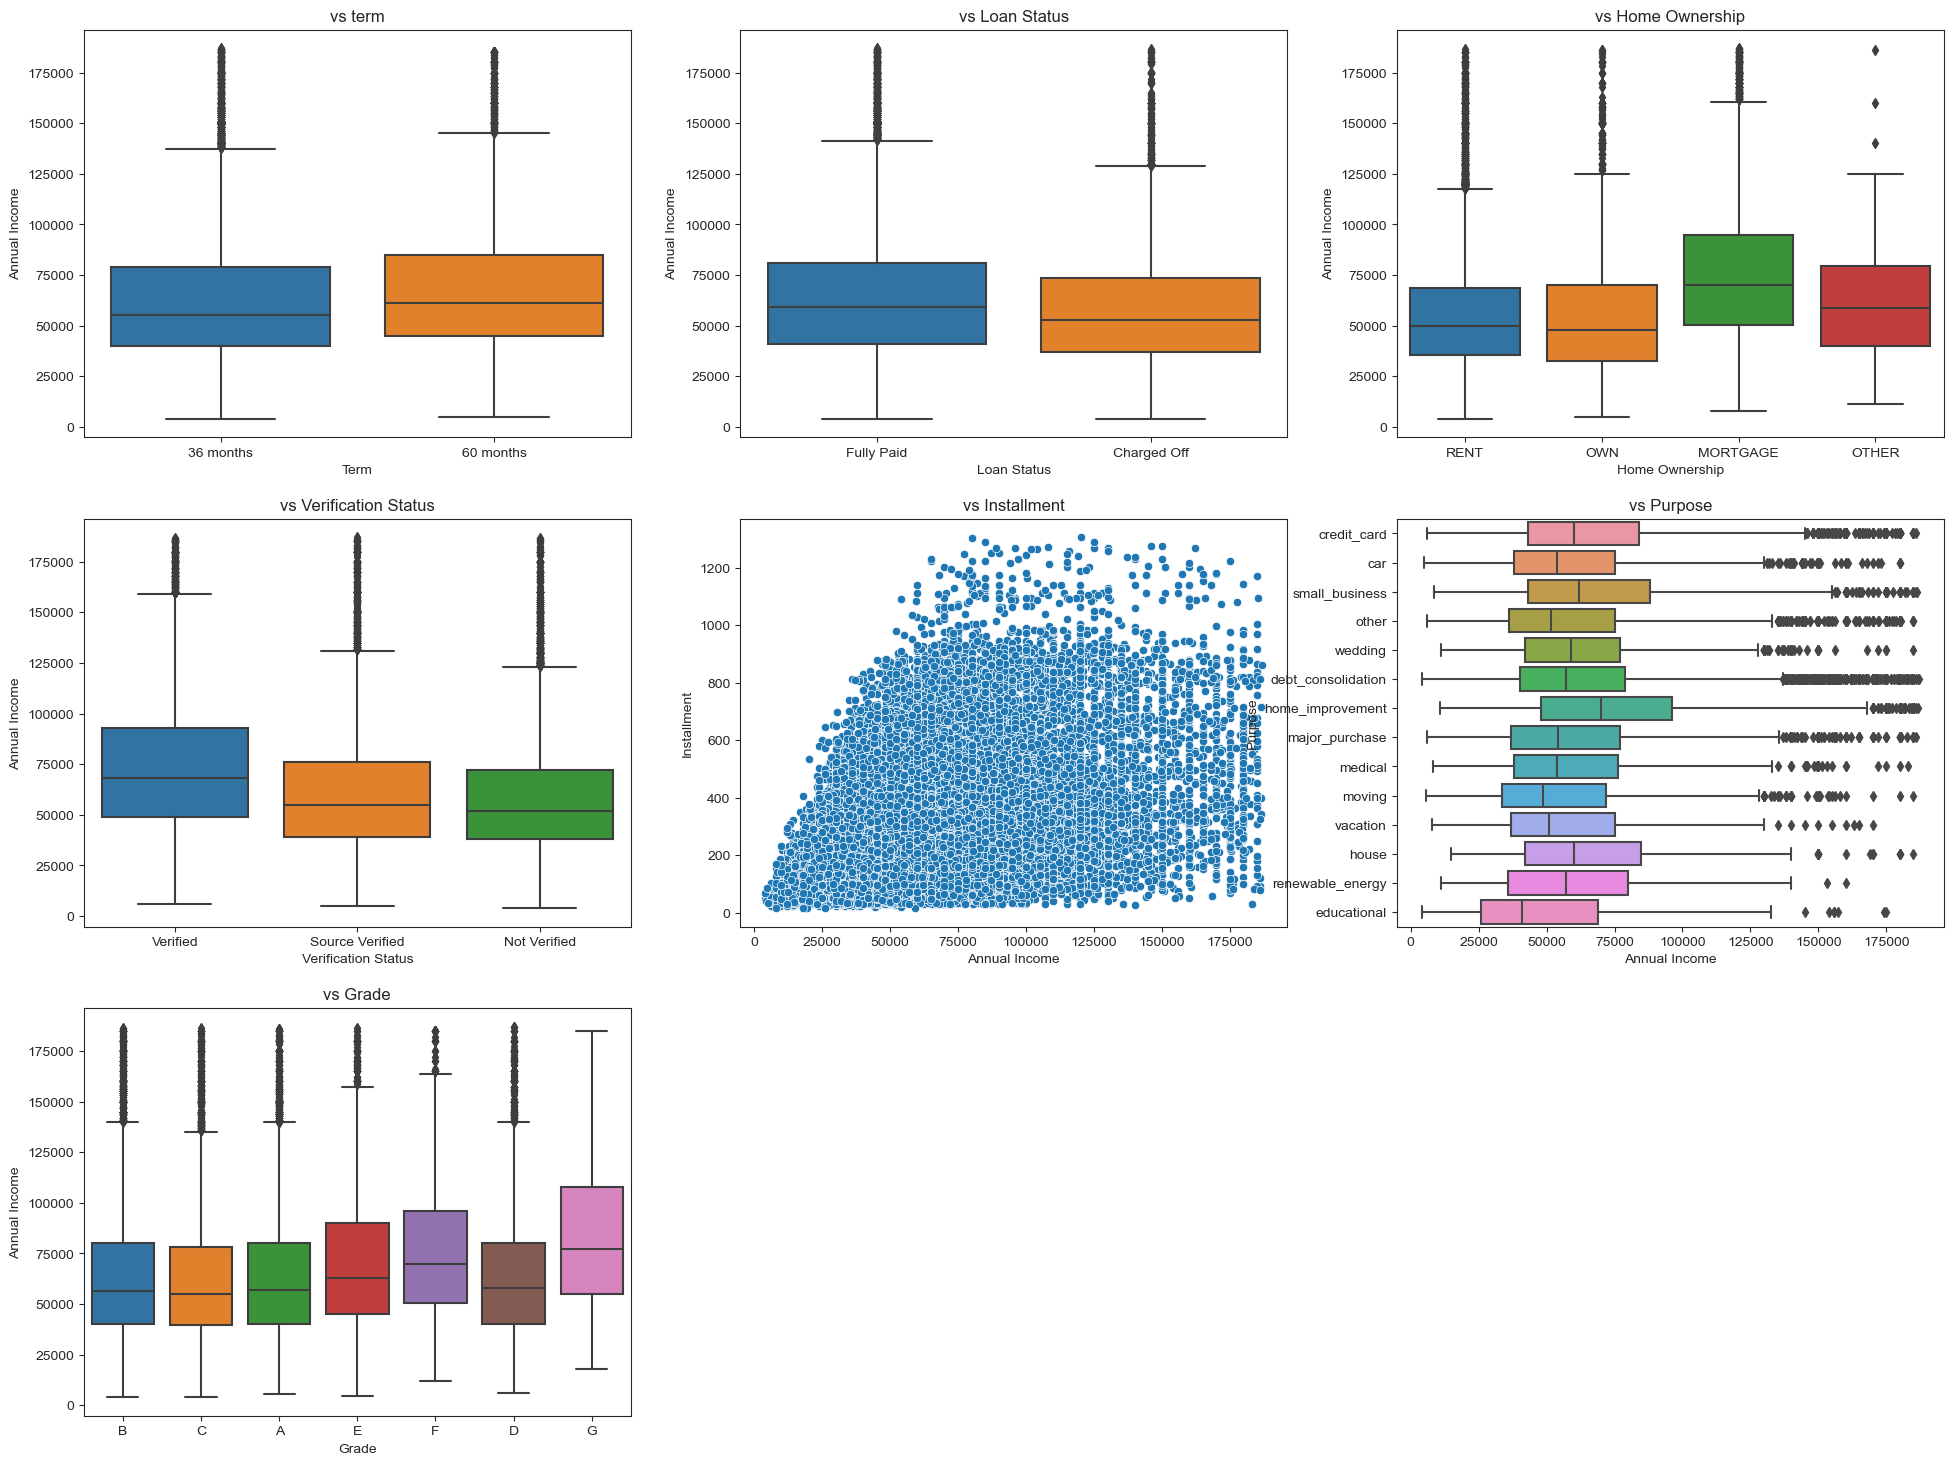

In [104]:
fig_size = (24,18)
data_to_plot = loan_df
plt.subplots_adjust(hspace=0.2, wspace=0.4)
plt.figure(figsize=fig_size)

# Subplot I - vs Term
plt.subplot(3,3,1)
sns.boxplot(data=data_to_plot, x='term', y='annual_inc')
plt.ylabel('Annual Income')
plt.xlabel('Term')
plt.title('vs term')

# Subplot II - vs Loan Status
plt.subplot(3,3,2)
sns.boxplot(data=data_to_plot, x='loan_status', y='annual_inc')
plt.ylabel('Annual Income')
plt.xlabel('Loan Status')
plt.title('vs Loan Status')

# Subplot III - vs home_ownership
plt.subplot(3,3,3)
sns.boxplot(data=data_to_plot, x='home_ownership', y='annual_inc')
plt.ylabel('Annual Income')
plt.xlabel('Home Ownership')
plt.title('vs Home Ownership')

# Subplot IV - vs Verification Status
plt.subplot(3,3,4)
sns.boxplot(data=data_to_plot, x='verification_status', y='annual_inc')
plt.ylabel('Annual Income')
plt.xlabel('Verification Status')
plt.title('vs Verification Status')

# Subplot V - vs Installment
plt.subplot(3,3,5)
sns.scatterplot(data=data_to_plot, y='installment', x='annual_inc')
plt.ylabel('Installment')
plt.xlabel('Annual Income')
plt.title('vs Installment')

# Subplot VI - vs purpose
plt.subplot(3,3,6)
sns.boxplot(data=data_to_plot, y='purpose', x='annual_inc')
plt.ylabel('Purpose')
plt.xlabel('Annual Income')
plt.title('vs Purpose')

# Subplot VII - vs grade
plt.subplot(3,3,7)
sns.boxplot(data=data_to_plot, x='grade', y='annual_inc')
plt.ylabel('Annual Income')
plt.xlabel('Grade')
plt.title('vs Grade')

# Subplot VIII - vs int_rate


plt.show()

In [105]:
loan_df.groupby(by='addr_state').annual_inc.mean().sort_values(ascending=False)

addr_state
DC    76622.840580
MD    70968.504479
AK    70555.382105
VA    69132.143045
NJ    68068.235711
TX    67605.402483
CA    66881.198699
MA    66208.751506
CT    66008.802482
NH    65455.628344
NY    64993.282315
NV    64861.012288
GA    64681.655206
LA    63957.183846
IL    63739.666847
DE    63390.409091
RI    63005.189418
WA    62507.288584
HI    62174.711758
MI    61542.423501
TN    61530.058824
UT    61496.555142
AZ    61329.399420
CO    60963.240306
OK    60119.093521
WI    60091.011392
AL    59972.122135
NC    59953.910571
KY    59774.760386
KS    59743.496320
FL    59545.360051
PA    59476.793594
MN    58474.831575
SC    58461.326532
MO    58152.281662
ID    57792.933333
OH    57778.745069
OR    57136.769192
NM    57062.083352
WY    55625.601000
AR    55368.542193
MS    55121.526316
WV    54763.959070
MT    53939.756627
VT    53589.464340
IA    50599.200000
SD    50113.097705
NE    49624.000000
IN    35416.111111
ME    23866.666667
Name: annual_inc, dtype: float64

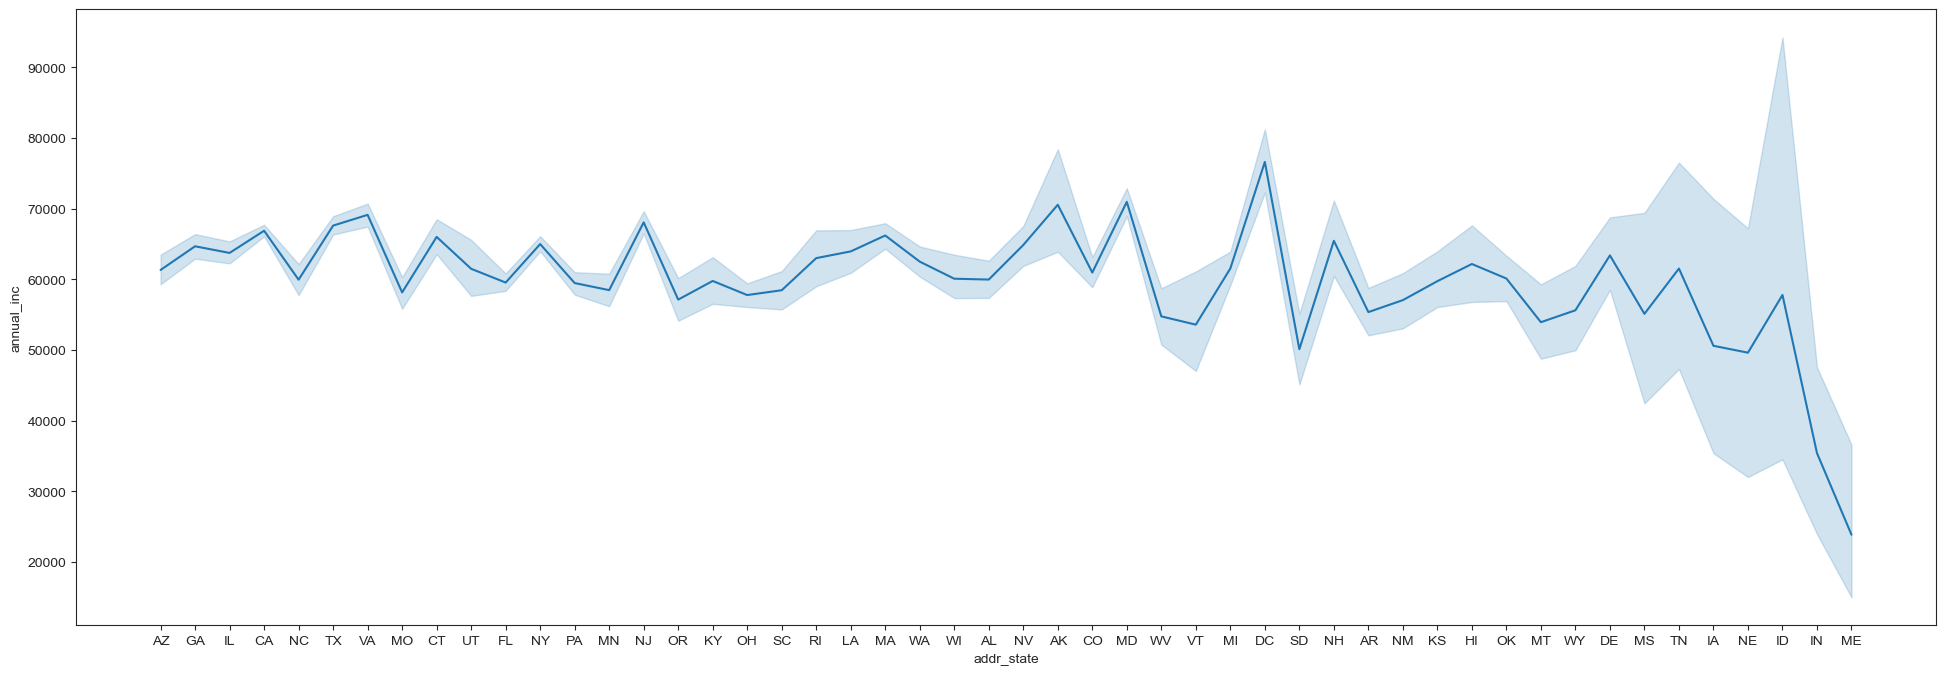

In [106]:
# Annual_inc by state.
plt.figure(figsize=(24,8))
sns.lineplot(data=loan_df, x='addr_state',y='annual_inc', estimator=np.mean)
plt.show()

Text(0.5, 1.0, 'vs Interest Rate Group')

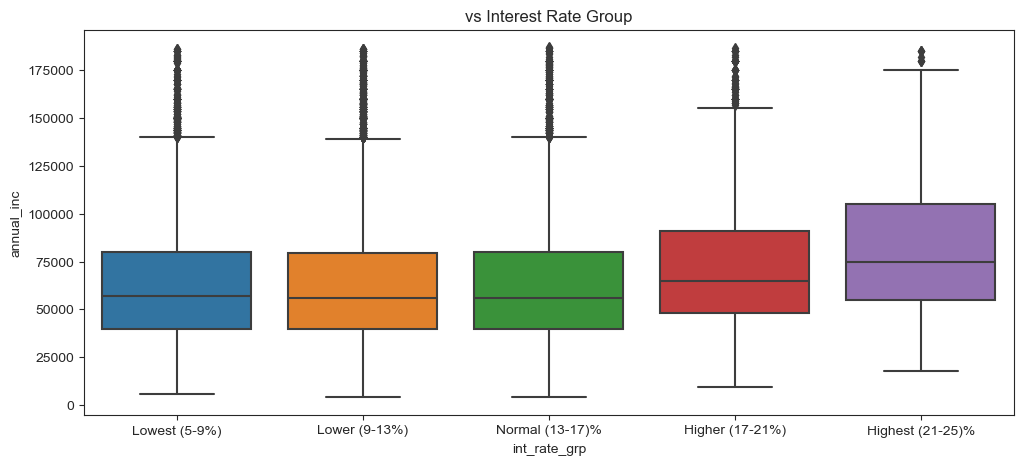

In [107]:
# Annual Income vs Interest Rate. 
plt.figure(figsize=(12,5))
sns.boxplot(data=data_to_plot, y='annual_inc', x='int_rate_grp')
plt.title('vs Interest Rate Group')

**Findings:** 
- **Term:** Borrowers who opted for the longer term had slightly higher annual income. 
- **Loan Status:** Defaulters have slightly less median annual income compared to people who fully paid. 
- **Home Ownership:** Mortgage owners have higher income compared to others.
- **Verification Status:** `Verified` borrowers had higher annual income compared to `source_verified`. `Not Verified` borrowers had the least median annual income compared to `verified` and `source_verified` borrowers.

- **Installment:** Most of the installments are under 1000, no clear pattern is seen between annual income and installments.
- **Puprose:** Borrowers with `home_improvement` as the purpose had the highest median annual income, while people who borrowed for `education` had the lowest median annual income.
- **Borrower's State:** People from `DC` were the highest earners on average at ~76k per year, with borrowers from `ME` being the least at ~24k.
- **Interest Rate:** Borrowers with interest rate higher than 17% had a higher median annual income compared to borrowers who had interest rate less than 17%. There are a lot of outliers for annual income with income higher than 140k under the `Lowest (5-9%)`, `Lower (9-13%)` and `Normal (13-17%)` groups.

## Bi-Variate Analysis <br> *(Finding relationship/correlation between 2 variables)*

### **Installment amount by Loan Status** 

In [108]:
# The mean and median rise slightly within the defaulters.
print("Installment median: {0:.2f}\n\n{1}".format(defaulters.installment.median(), defaulters.installment.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.98])))

Installment median: 291.76

count    5532.000000
mean      333.208946
std       214.137782
min        22.790000
25%       168.447500
50%       291.760000
75%       452.535000
90%       643.566000
95%       786.010000
98%       879.641000
max      1305.190000
Name: installment, dtype: float64


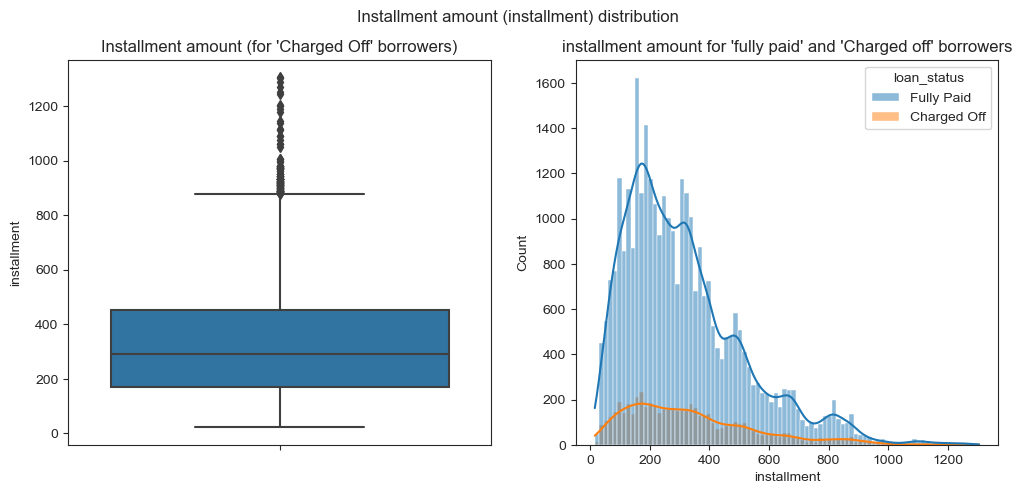

In [109]:
fig_size = (12,5)
data_to_plot = loan_df
x_label = 'installment'
plot_title = 'Installment amount (installment) distribution'

plt.figure(figsize=fig_size)

# Box plot
plt.subplot(1,2,1)
plt.title('Installment amount (for \'Charged Off\' borrowers)')
sns.boxplot(data=defaulters, y=x_label)

# Hist plot
plt.subplot(1,2,2)
sns.histplot(data=data_to_plot, x=x_label, kde=True, hue='loan_status')
plt.title('installment amount for \'fully paid\' and \'Charged off\' borrowers')
plt.xlabel(xlabel=x_label)

plt.suptitle(plot_title)
plt.show()

**Findings:** If we consider only defaulters, the mean installment increases to `334` and median to `290`. Indicating defaulters were paying a slightly higher installment. 

### **Loan Purpose by Loan Status** 

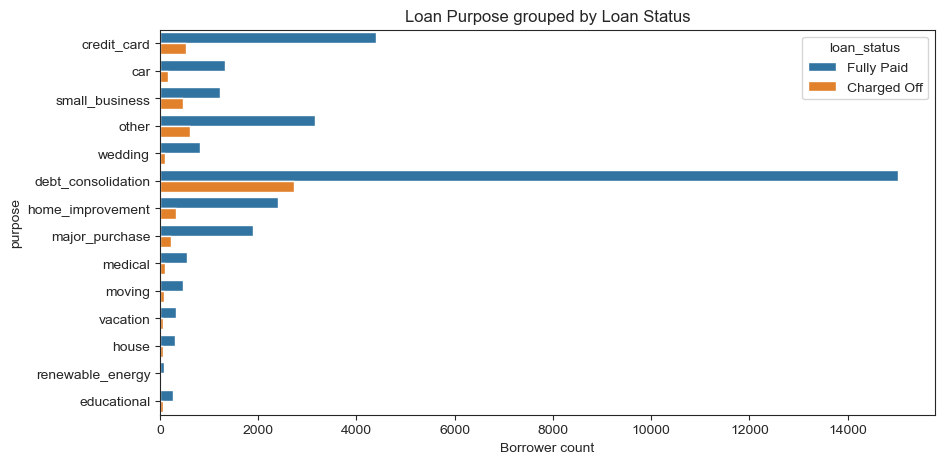

In [110]:
## purpose - loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,y='purpose', hue='loan_status')
plt.xlabel('Borrower count')
plt.title('Loan Purpose grouped by Loan Status')
plt.show()

**Findings:** It doesn't change that much with loan status. Borrowers with purpose as `debt_consolidation` were the highest defaulters and the highest borrowers as well. 

### **Loan Status by Home ownership** 

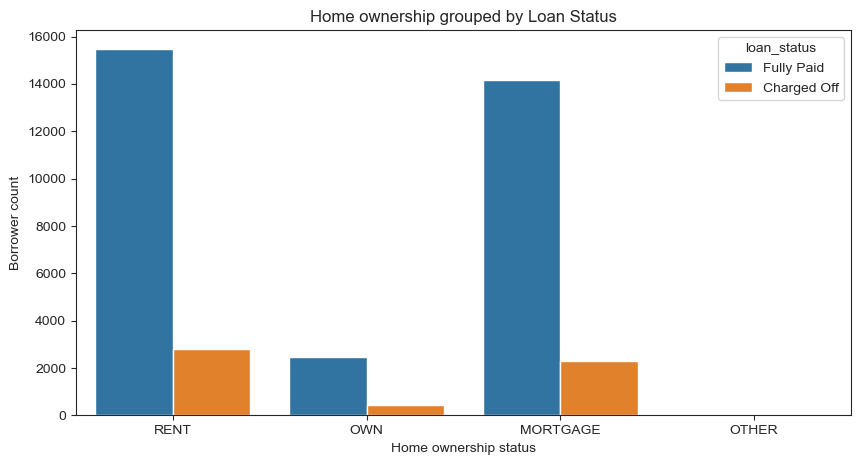

In [111]:
## Loan status - home ownership
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='home_ownership', hue='loan_status')
plt.ylabel('Borrower count')
plt.xlabel('Home ownership status')
plt.title('Home ownership grouped by Loan Status')
plt.show()

**Findings:** We see that people under their own housing are less likely to borrow and less likely to default on it as well.

### **Loan Status by Grade**


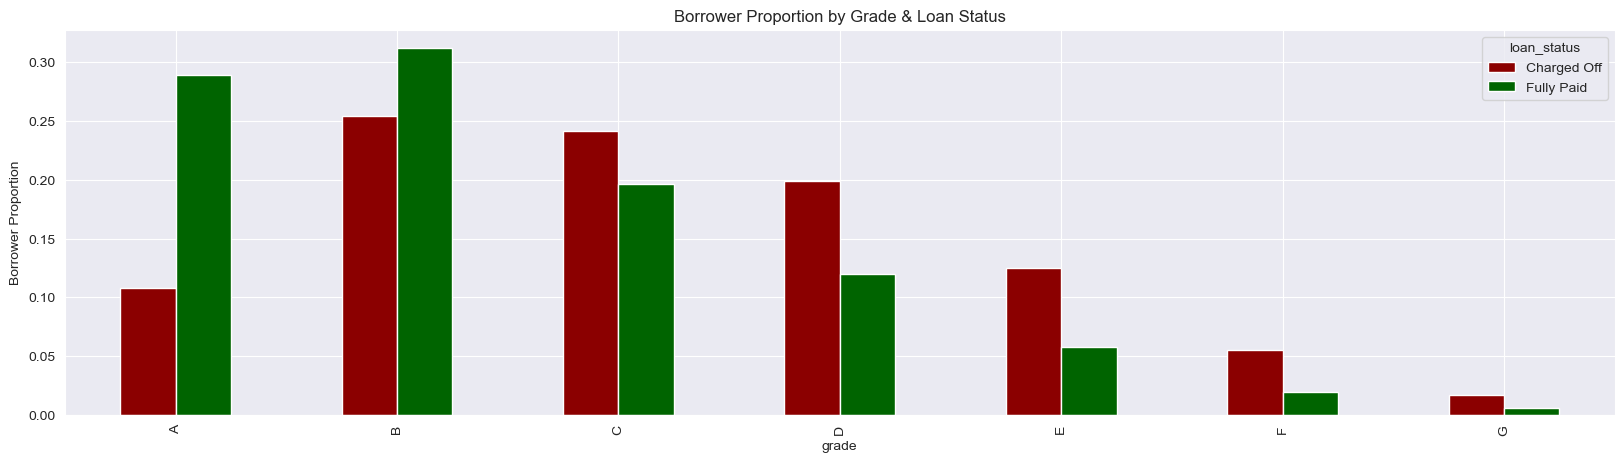

In [160]:
grade_status_pivot=loan_df.pivot_table(index='grade', columns='loan_status', values='id', aggfunc='count', margins=True)
grade_status_proportion = grade_status_pivot.div(grade_status_pivot.loc['All'])
status_legend_colors = {'Fully Paid': 'darkred', 'Charged Off': 'darkgreen'}
grade_status_proportion.drop('All', axis=1).drop('All',axis=0).plot(kind='bar', figsize=(20,5), color=[status_legend_colors.get(x) for x in loan_df['loan_status']])
plt.ylabel('Borrower Proportion')
plt.title('Borrower Proportion by Grade & Loan Status')
plt.show()


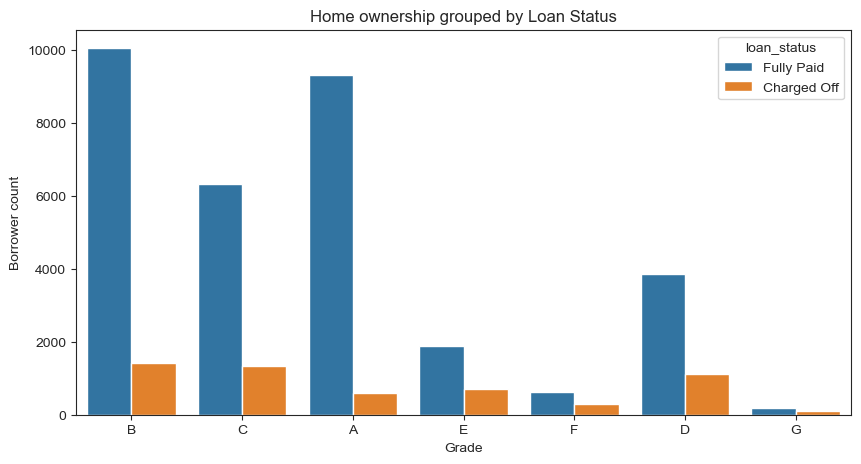

In [113]:
## Loan status - home ownership
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='grade', hue='loan_status')
plt.ylabel('Borrower count')
plt.xlabel('Grade')
plt.title('Home ownership grouped by Loan Status')
plt.show()

**Findings**: Borrowers with `Grade B` and `Grade C` has high chances to Default

### **Interest Rate Groups by loan status**

In [154]:
## Calculating proportion of defaulters in each group of the loan_status
loan_status_intrate_pivot = loan_df.pivot_table(index='int_rate_grp', columns='loan_status', values='id', aggfunc='count', margins=True)
loan_status_int_rate_proportion = 100 * loan_status_intrate_pivot / loan_status_intrate_pivot.loc['All']
loan_status_int_rate_proportion

loan_status       Charged Off  Fully Paid         All
int_rate_grp                                         
Lowest (5-9%)       10.502531   28.210062   25.615215
Lower (9-13%)       32.718727   37.564791   36.854653
Normal (13-17)%     37.490962   26.962351   28.505205
Higher (17-21%)     16.757050    6.710326    8.182565
Highest (21-25)%     2.530730    0.552469    0.842362
All                100.000000  100.000000  100.000000

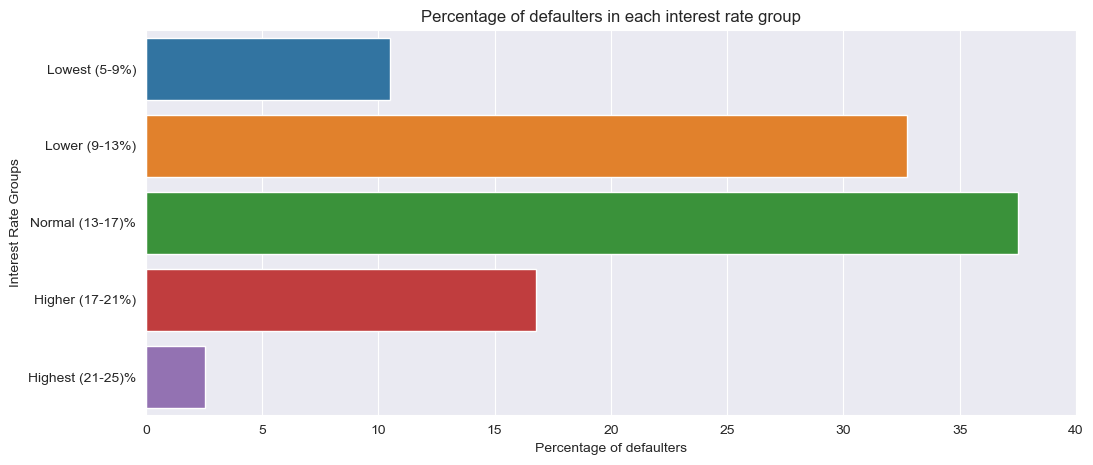

In [153]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.barplot(loan_status_int_rate_proportion.drop('All').reset_index(), y='int_rate_grp', x='Charged Off')
plt.ylabel('Interest Rate Groups')
plt.xlabel('Percentage of defaulters')
plt.xticks(np.arange(0,45,5))
plt.title('Percentage of defaulters in each interest rate group')
plt.show()

**Findings:** The groups `Lower (9-13%)`, `Normal (13-17%)` and `Higher (17-21%)` account for majority of the defaulters.

### **Borrower's state by Loan Status**

In [116]:
## Proportion of defaulters in each group. 
addr_state_intrate_pivot = defaulters.pivot_table(index='addr_state', columns='int_rate_grp', values='id', aggfunc='count', margins=True)
# loan_status_int_rate_proportion = 100 * loan_status_intrate_pivot / loan_status_intrate_pivot.loc['All']
# loan_status_int_rate_proportion
addr_state_intrate_proportion = 100 * addr_state_intrate_pivot / addr_state_intrate_pivot.loc['All']
addr_state_intrate_proportion.drop('All', axis=0).sort_values(by='All', ascending=False)

int_rate_grp  Lowest (5-9%)  Lower (9-13%)  Normal (13-17)%  Higher (17-21%)  \
addr_state                                                                     
CA                19.621343      20.165746        20.443587        19.201726   
FL                 9.466437      10.497238         7.473481         9.169364   
NY                 9.638554       8.397790         8.630665         8.522114   
TX                 4.819277       4.917127         6.171649         5.609493   
NJ                 3.958692       5.303867         4.773385         4.854369   
GA                 3.958692       4.198895         3.953713         3.236246   
IL                 3.786575       3.922652         3.182257         2.912621   
PA                 4.130809       3.149171         2.989392         3.236246   
VA                 3.098107       2.928177         3.085824         3.020496   
MD                 2.237522       2.430939         2.989392         3.344121   
MA                 3.270224       2.209945         3.471553         2.049622   
OH                 1.893287       2.707182         2.603664         3.451996   
WA                 2.753873       2.044199         2.459016         2.265372   
AZ                 1.893287       2.265193         2.266152         1.833873   
NC                 3.098107       1.657459         1.928640         2.481122   
MO                 1.721170       2.209945         2.459016         1.078749   
NV                 0.860585       1.988950         1.928640         2.588997   
MI                 2.065404       1.657459         1.591128         2.912621   
CO                 1.893287       1.878453         1.783992         1.618123   
CT                 1.376936       1.657459         1.687560         2.265372   
MN                 2.065404       1.491713         1.494696         1.078749   
OR                 1.549053       0.828729         1.350048         1.941748   
SC                 0.860585       1.325967         1.157184         0.970874   
WI                 0.516351       0.994475         1.205400         1.402373   
AL                 0.516351       0.607735         1.350048         1.078749   
LA                 1.032702       1.270718         0.867888         0.431499   
KY                 0.860585       0.497238         1.060752         0.970874   
OK                 0.516351       0.828729         0.626808         0.970874   
UT                 0.344234       0.552486         0.578592         1.618123   
KS                 1.032702       0.773481         0.289296         0.539374   
NM                 1.032702       0.718232         0.385728         0.323625   
HI                 0.688468       0.331492         0.626808         0.431499   
AR                 0.344234       0.662983         0.289296         0.647249   
NH                 0.344234       0.718232         0.337512         0.323625   
RI                 0.516351       0.497238         0.433944         0.323625   
WV                 1.204819       0.165746         0.433944         0.215750   
DC                 0.000000       0.386740         0.241080         0.215750   
AK                 0.172117       0.165746         0.289296         0.323625   
SD                 0.344234       0.220994         0.192864         0.107875   
MT                 0.172117       0.165746         0.241080         0.215750   
DE                 0.344234       0.165746         0.241080         0.107875   
VT                 0.000000       0.110497         0.192864         0.000000   
WY                 0.000000       0.000000         0.144648         0.107875   
NE                 0.000000       0.165746         0.000000         0.000000   
TN                 0.000000       0.110497         0.000000         0.000000   
MS                 0.000000       0.055249         0.048216         0.000000   
ID                 0.000000       0.000000         0.048216         0.000000   

int_rate_grp  Highest (21-25)%        All  
addr_state                         

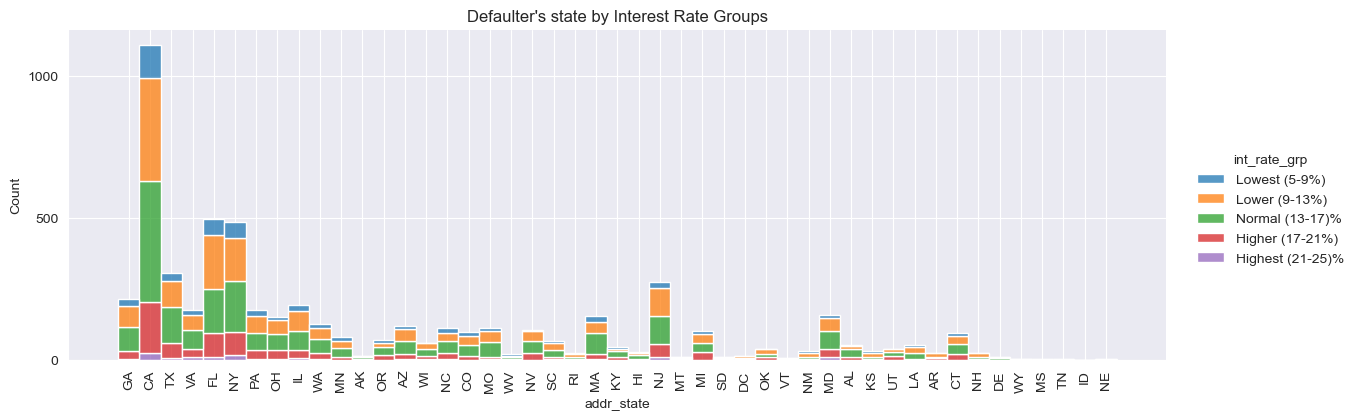

In [117]:
sns.displot(data=defaulters, x='addr_state', hue='int_rate_grp', multiple='stack', aspect=3, height=4)
plt.title('Defaulter\'s state by Interest Rate Groups')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,1500,500))
plt.show()

**Findings**: Borrowers in `CA`, `FL` and `NY` are most likely to default on their loans compared to other states.

### **Borrower's state by interest rate**

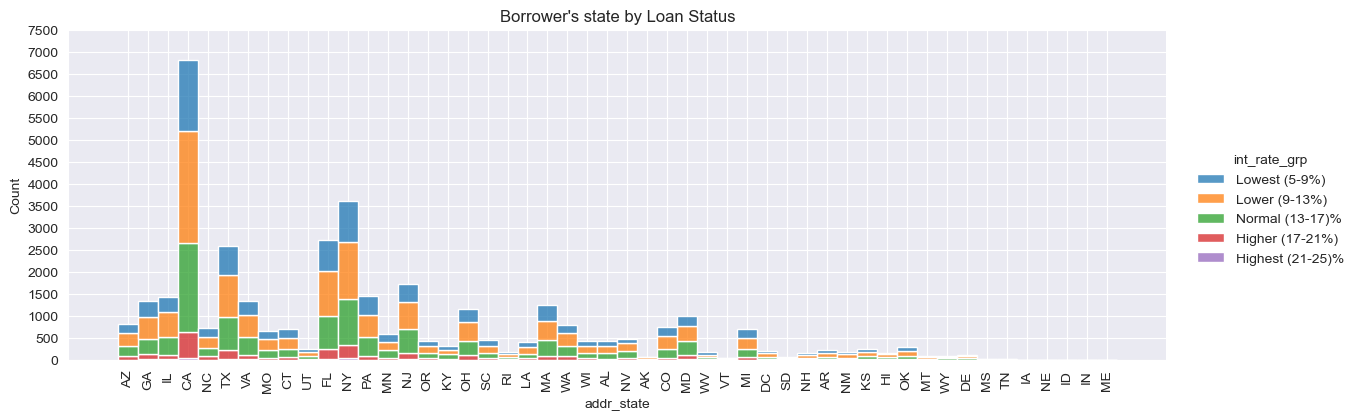

In [118]:
sns.displot(data=loan_df, x='addr_state', hue='int_rate_grp', multiple='stack', aspect=3, height=4)
plt.title('Borrower\'s state by Loan Status')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,8000,500))
plt.show()

**Findings:** We see `CA`, `FL` and `NY` are mostly under these 3 interest groups - `Lowest (5-9%)`, `Lower (9-13%)` and `Normal (13-17%)`. `CA` has about ~500 borrowers who are paying interest between 17-21%. 

### **Employee Length by Verification Status** <br>

In [119]:
loan_df.groupby(by='verification_status').emp_length.count()

verification_status
Not Verified       16497
Source Verified     9432
Verified           11822
Name: emp_length, dtype: int64

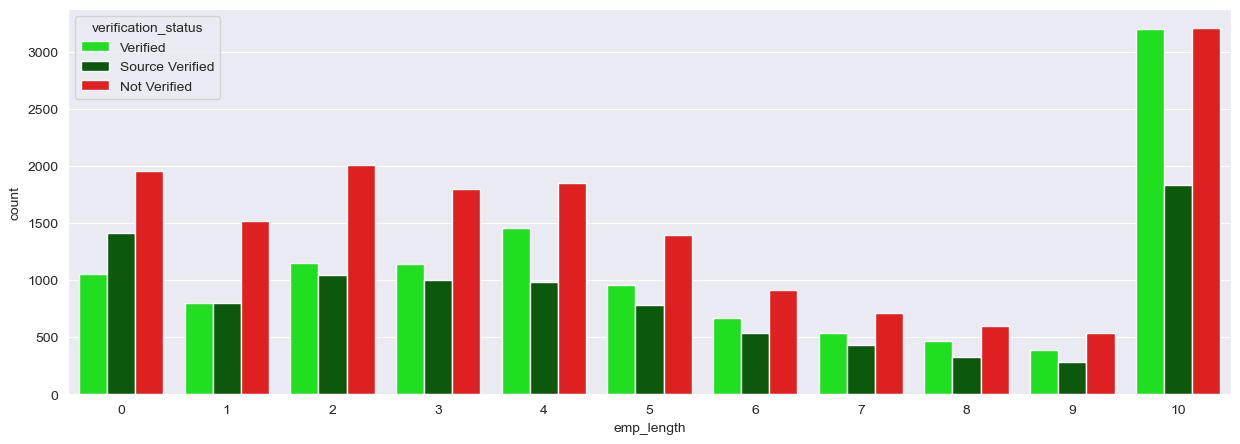

In [120]:
plt.figure(figsize=(15,5))
vf_legend_colors = {'Verified':'lime', 'Source Verified':'darkgreen', 'Not Verified':'red'}
sns.countplot(data=loan_df, x='emp_length', hue='verification_status', palette=vf_legend_colors.values() )
plt.show()

**Findings:** LC should verify employees across all tenures to reduce the probability of a default. There is a high proportion of borrowers across all tenures who were not verified. 

### **Borrower's state by Verification Status** <br>

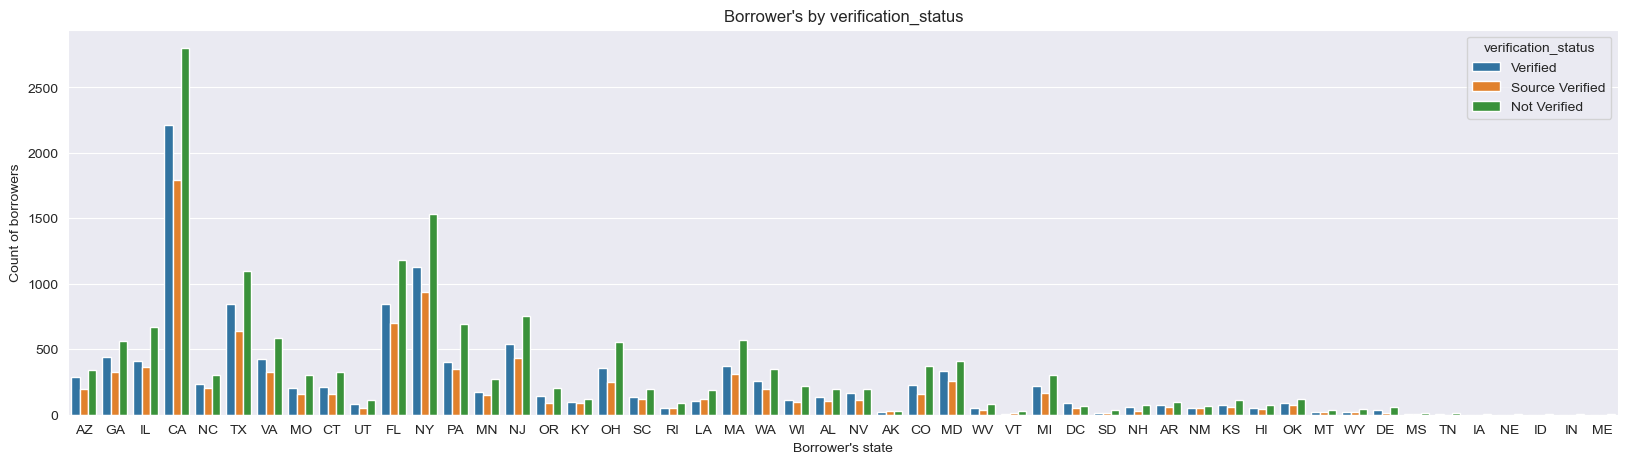

In [121]:
## Borrower's state by verification status.
plt.figure(figsize=(20,5))
sns.countplot(data=loan_df,x='addr_state', hue='verification_status')
plt.ylabel('Count of borrowers')
plt.xlabel('Borrower\'s state')
plt.title('Borrower\'s by verification_status')
plt.show()

In [122]:
## Verification Status proportion.
vf_status_pivot=loan_df.pivot_table(index='addr_state', columns='verification_status', values='id', aggfunc='count', margins=True)
vf_status_proportion = vf_status_pivot.div(vf_status_pivot.loc['All'])
vf_status_proportion *= 100
vf_status_proportion.sort_values(by='Not Verified', ascending=False).drop('All', axis=0).head()


verification_status  Not Verified  Source Verified   Verified        All
addr_state                                                              
CA                      16.972783        18.967345  18.702419  18.012768
NY                       9.310784         9.923664   9.524615   9.530873
FL                       7.183124         7.421544   7.139232   7.228948
TX                       6.661817         6.806616   7.181526   6.860745
NJ                       4.576590         4.580153   4.593131   4.582660

**Findings:** `CA`, `NY`, `FL`, `TX`, `NJ` account for almost half (~ 44.70%) of the not verified borrower count.

### **Loan Status by Verification Status** 

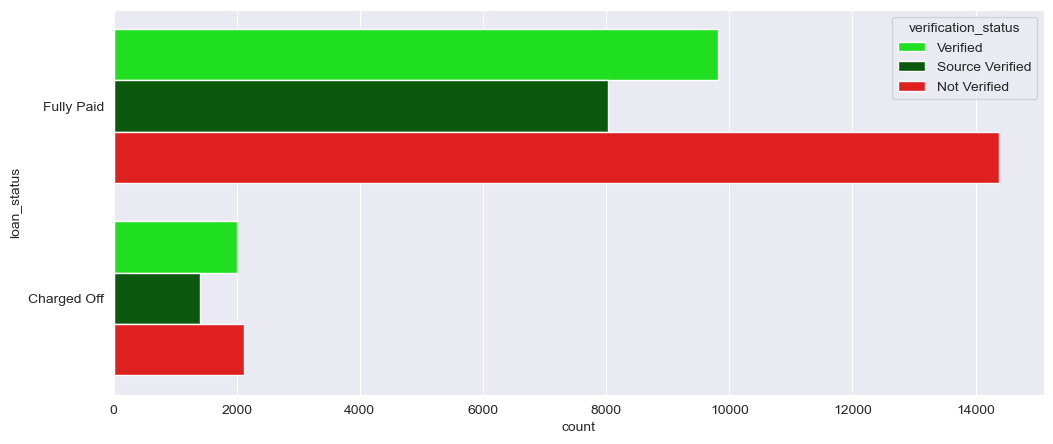

In [123]:
plt.figure(figsize=(12,5))
sns.countplot(data=loan_df,y='loan_status', hue='verification_status', palette = vf_legend_colors.values())
plt.show()

**Findings:** A large portion of the defaulters as well as the people who fully paid their loans were not verified by the LC.

### **Annual income distribution by Loan Status**

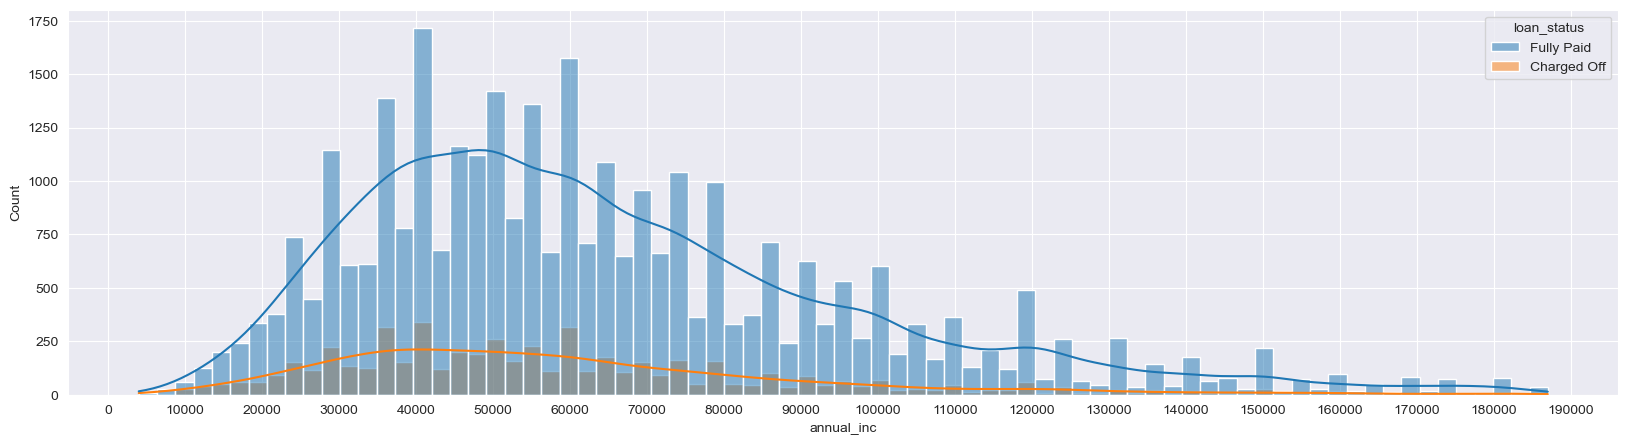

In [124]:
#Compare annual_inc for ChargedOff
plt.figure(figsize=(20,5))
sns.histplot(x='annual_inc', data=loan_df, kde=True, hue='loan_status')
plt.xticks(np.arange(0,200000,10000))
plt.show()

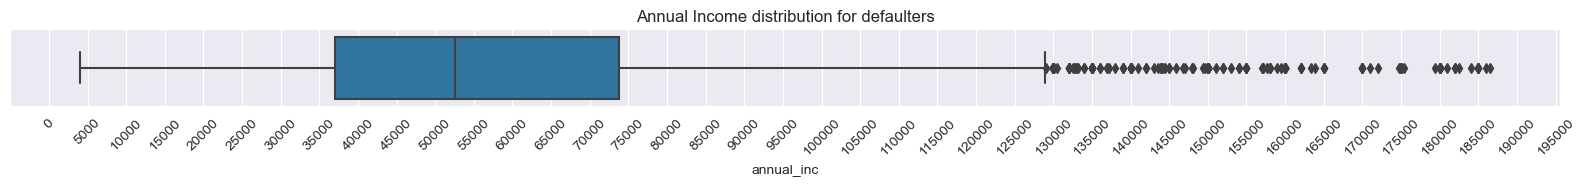

In [125]:
plt.figure(figsize=(20,1))
sns.boxplot(defaulters, x='annual_inc')
plt.xticks(np.arange(0,200000,5000))
plt.xticks(rotation=45)
plt.title('Annual Income distribution for defaulters')
plt.show()

**Findings**: Most of the defaulters have income between 37k to 73k

### Loan Status by Earliest Credit line year.

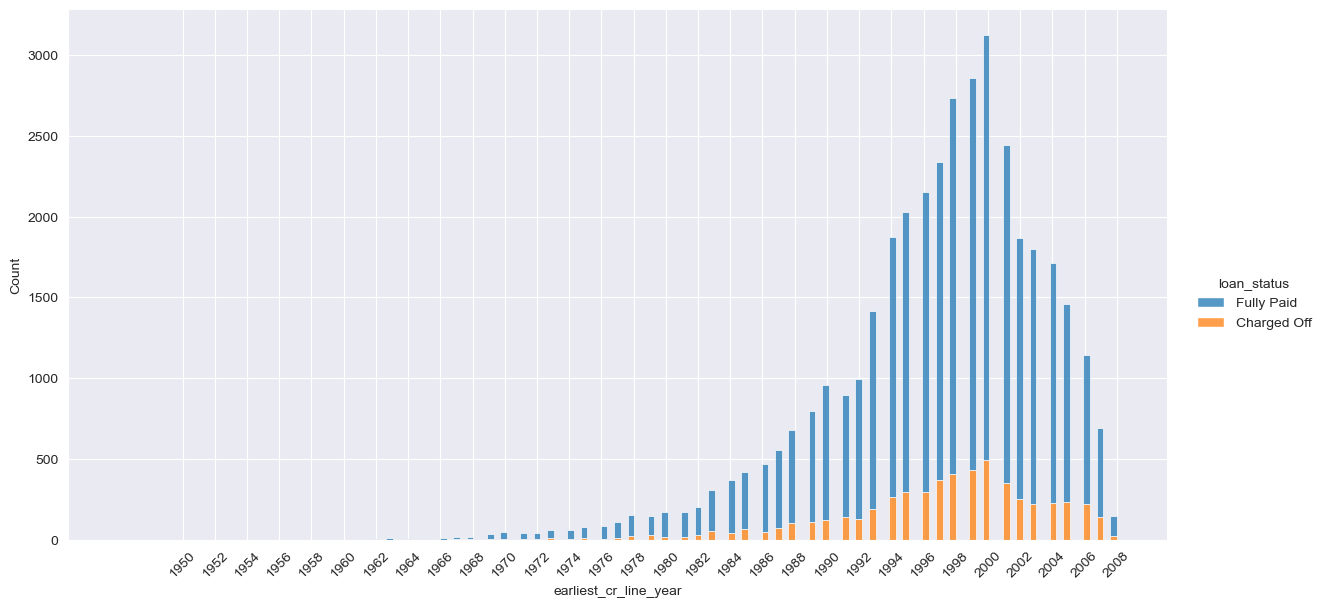

In [126]:
sns.displot(data=loan_df, x='earliest_cr_line_year', hue='loan_status', multiple='stack', aspect=2,height=6)
plt.xticks(np.arange(1950,2010,2),rotation=45)
plt.show()

**Findings** A lot of defaulters had their first credit line opened during 1994 to 2000.

## **Multivariate Analysis**

### **Loan amount by Loan Purpose and Loan Status**

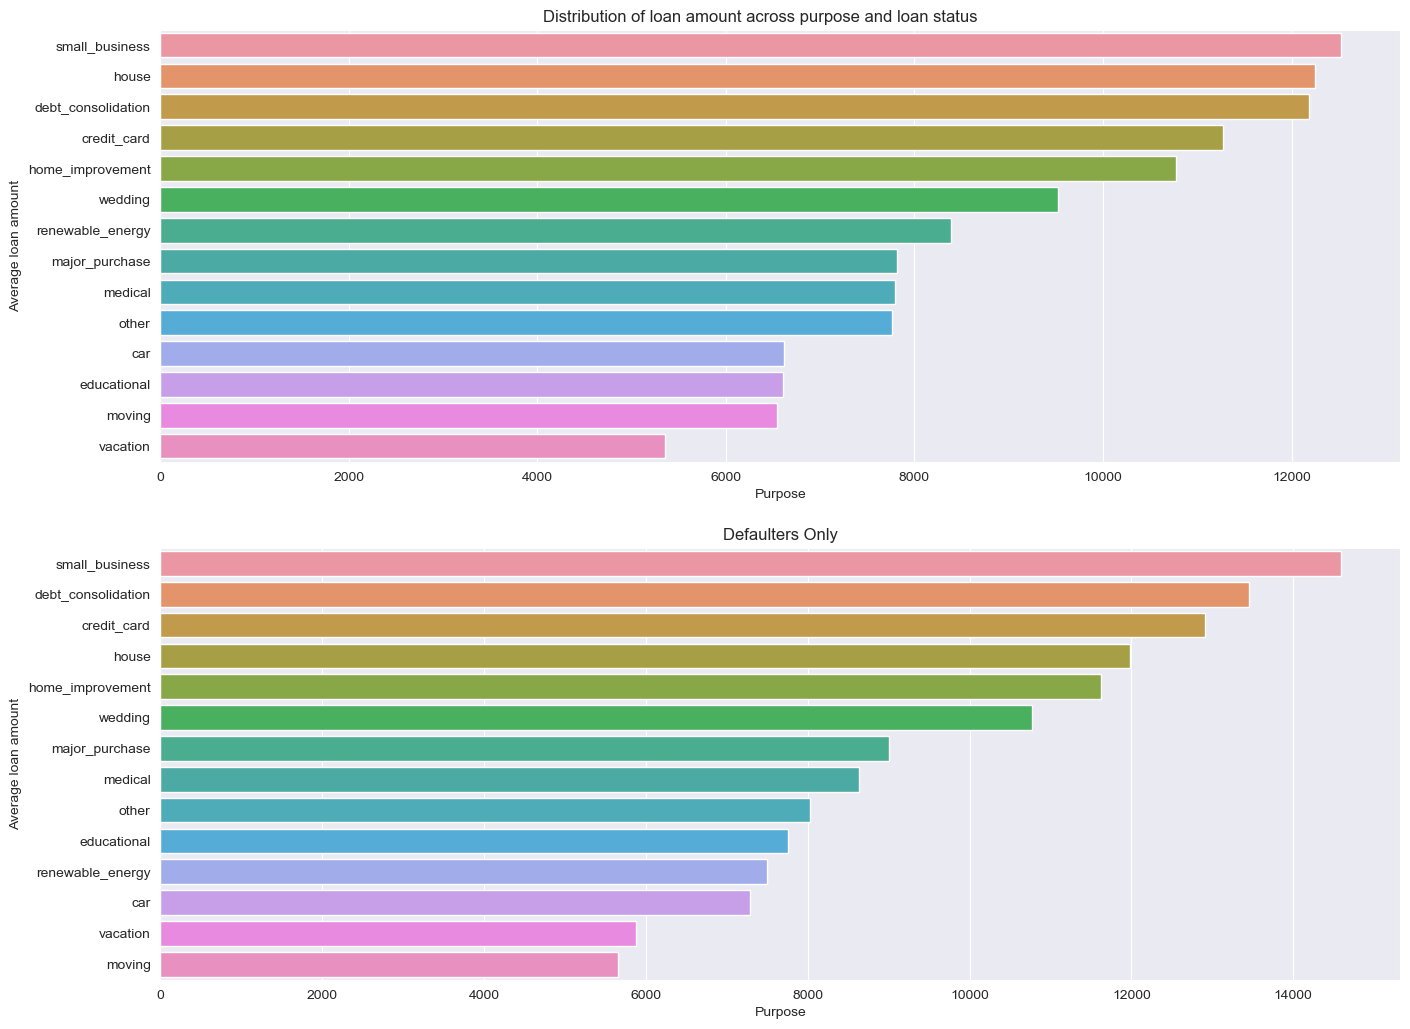

In [127]:
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
df = loan_df.pivot_table(values='loan_amnt', columns='loan_status', index='purpose', aggfunc=np.mean).reset_index().sort_values(by='Fully Paid', ascending=False)
sns.barplot(data=df, y='purpose', x='Fully Paid')
plt.ylabel('Average loan amount')
plt.xlabel('Purpose')
plt.xticks(rotation=0)

plt.subplot(2,1,2)
df = loan_df.pivot_table(values='loan_amnt', columns='loan_status', index='purpose', aggfunc=np.mean).reset_index().sort_values(by='Charged Off', ascending=False)
sns.barplot(data=df, y='purpose', x='Charged Off')
plt.ylabel('Average loan amount')
plt.xlabel('Purpose')
plt.title('Defaulters Only')
plt.xticks(rotation=0)

plt.suptitle('Distribution of loan amount across purpose and loan status')
plt.subplots_adjust(top=0.96,bottom=0.01)
plt.show()

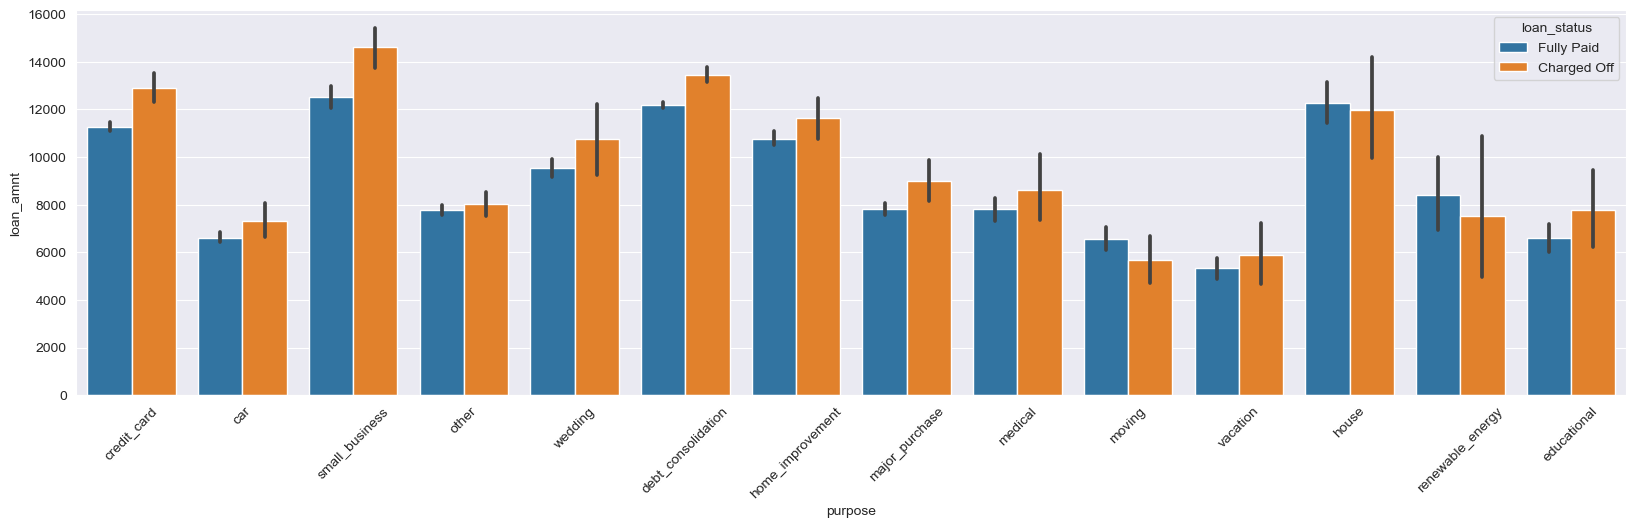

In [128]:
#Loan amount with Purpose
#data_to_plot = loan_df.groupby(by='purpose').sum().reset_index();
plt.figure(figsize=(20,5))
sns.barplot(data=loan_df, x='purpose', y='loan_amnt', hue='loan_status')
plt.xticks(rotation=45)
plt.show()

**Findings**: Charged off customers under small_business segment borrow a higher loan_amnt on average. The top 3 defaulters with high loan amounts are `small_business`, `debt_consolidation` and `credit_card`.

### **Borrower's state by Loan Amount & Loan Status**

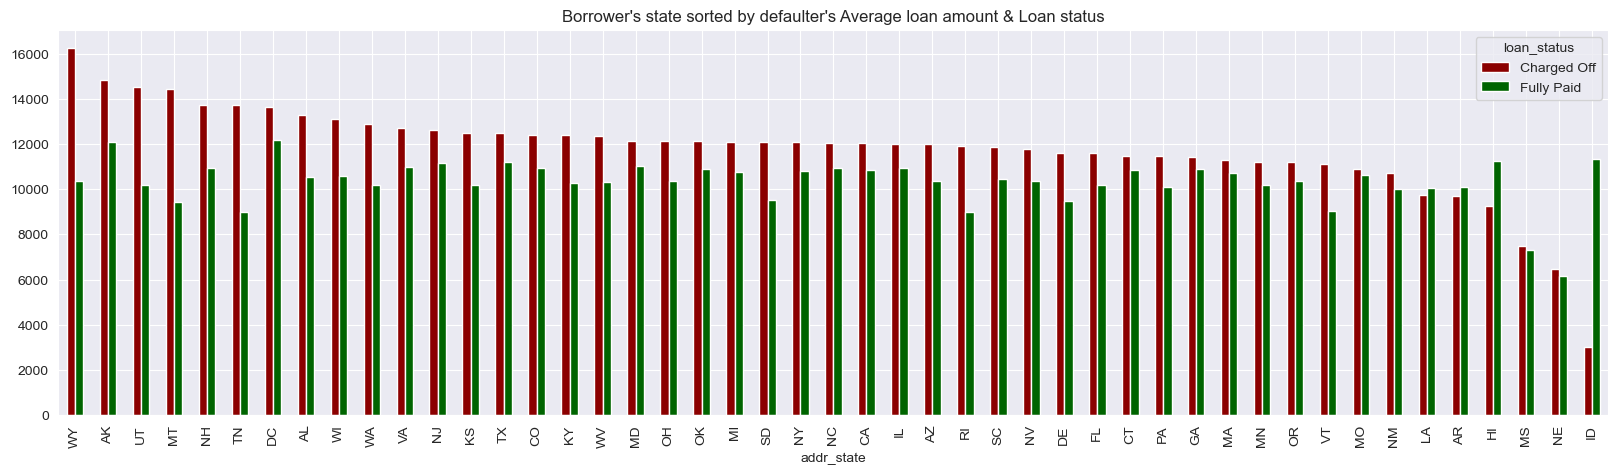

In [129]:
ordered_states_by_loan_amount = defaulters.groupby(by='addr_state').loan_amnt.mean().sort_values(ascending=False).index
vf_legend_colors = {'Fully Paid': 'darkred', 'Charged Off': 'darkgreen'}
loan_df.pivot_table(index='addr_state', 
                    columns='loan_status', aggfunc=np.mean,
                    values='loan_amnt').loc[ordered_states_by_loan_amount].plot(kind='bar', stacked=False,figsize=(20,5), color=[vf_legend_colors.get(x) for x in loan_df['loan_status']])
plt.title('Borrower\'s state sorted by defaulter\'s Average loan amount & Loan status')
plt.show()

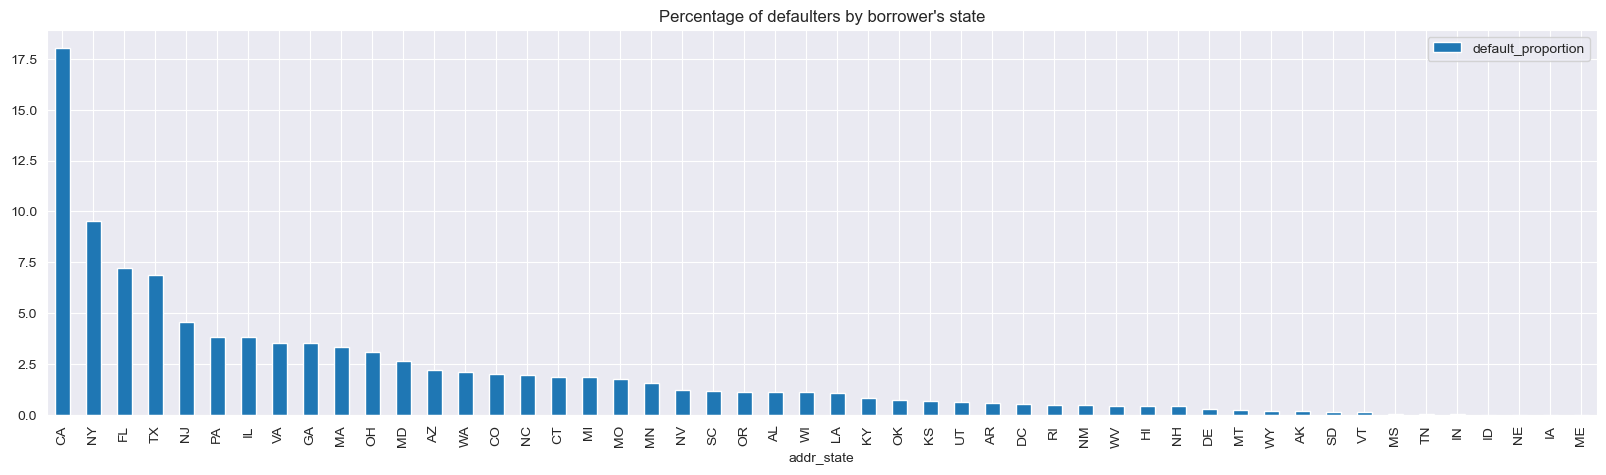

In [130]:
## Calculate the proportion of default per state for ordering the plot.
default_proportion = 100 * loan_df.groupby(by='addr_state').size() / loan_df.index.size
ordered_states = default_proportion.sort_values(ascending=False).index

pd.DataFrame(data = default_proportion, columns=['default_proportion']).loc[ordered_states].plot(kind='bar',figsize=(20,5))
plt.title('Percentage of defaulters by borrower\'s state')
plt.show()

**Findings:** `IA`,`IN` and `ME` had no defaulters. Whereas, `CA`, `NY`, `FL` and `TX` had the highest proportion of defaulters. Borrowers from `WY` and `AK` and `UT` are likely to default on higher loan amounts but the number of defaulters is less compared to other states.

### Correlation Matrix

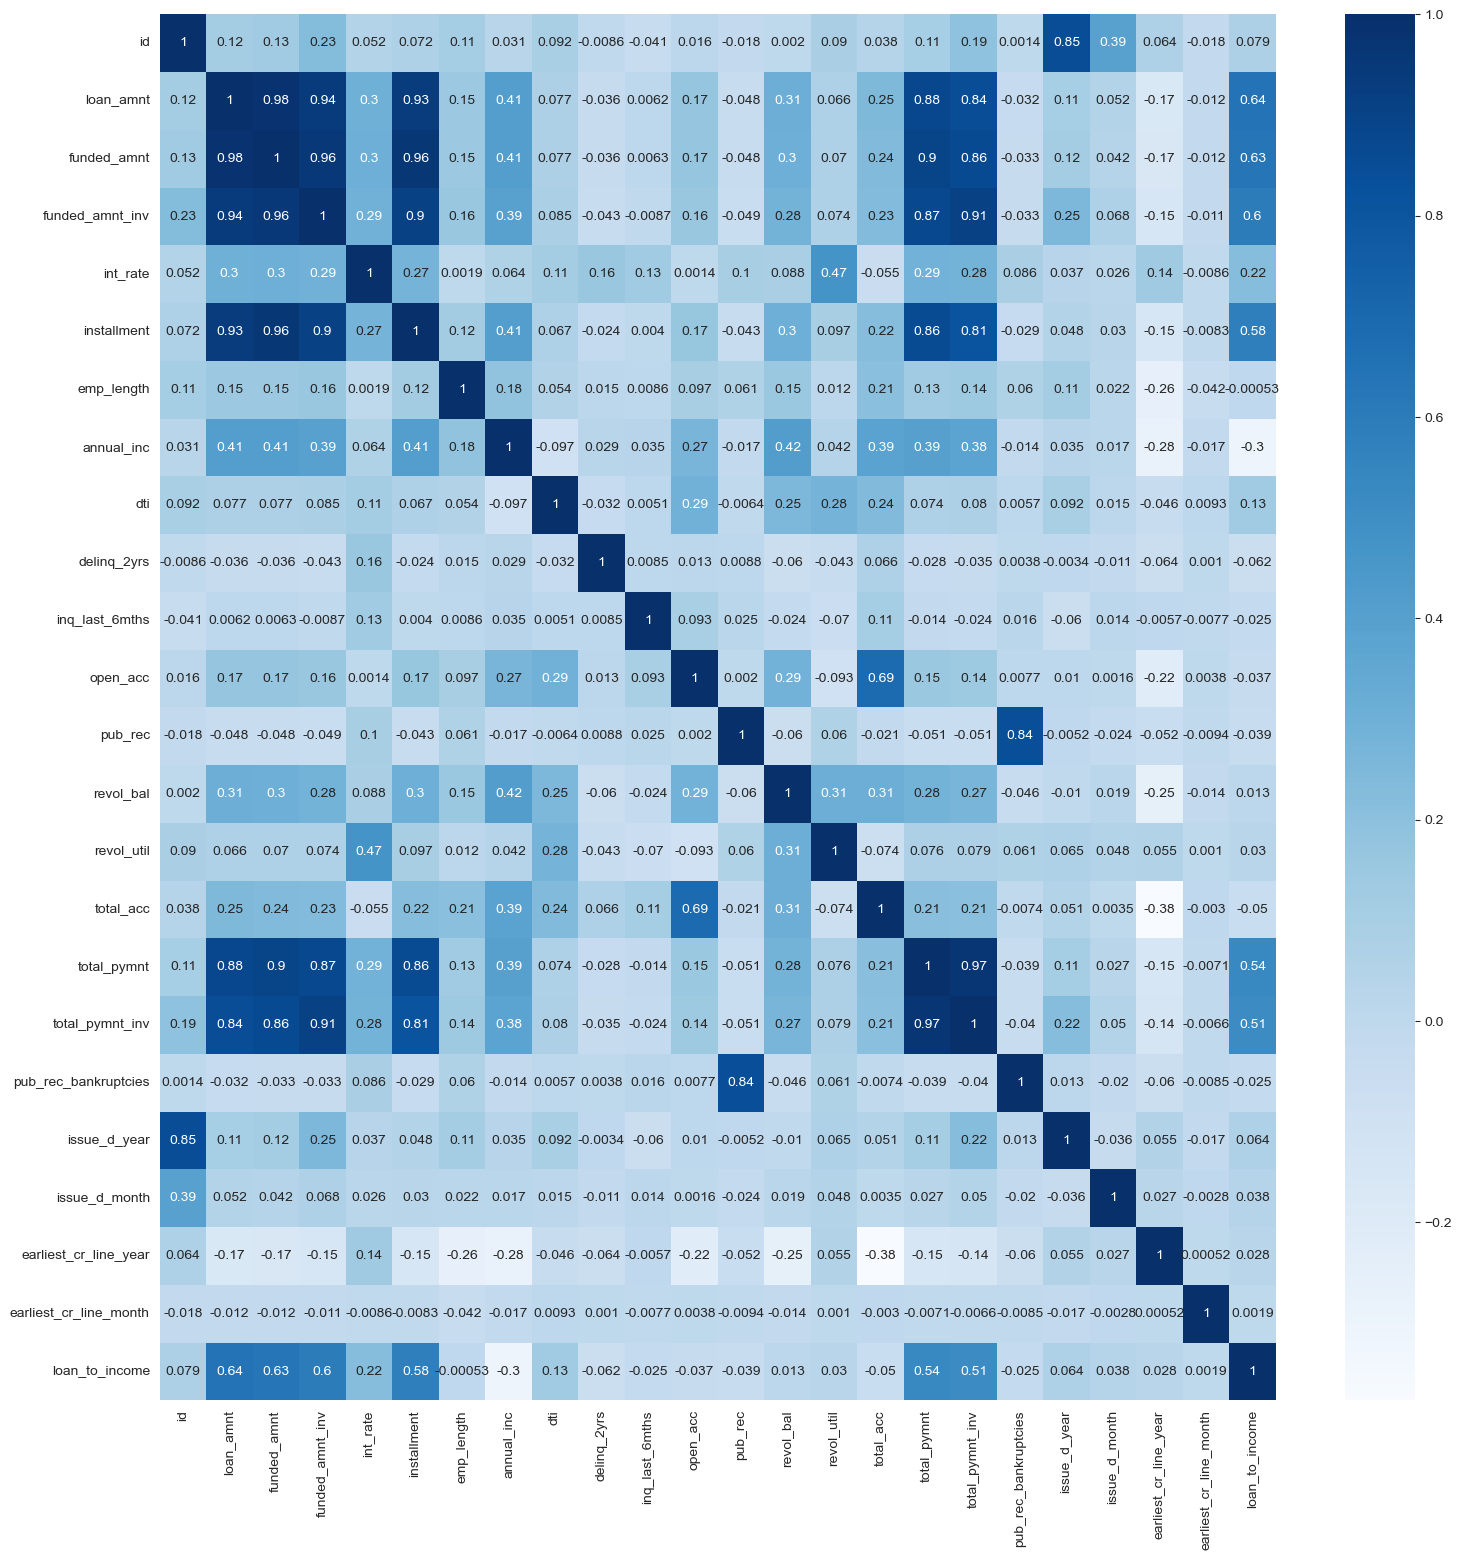

In [131]:
plt.figure(figsize=(18,18))
sns.heatmap(loan_df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

**Findings**: Strong correlation observed across `loan_amnt`, `funded_amnt`, `funded_amnt_inv` and `installment`.

### Pair Plot

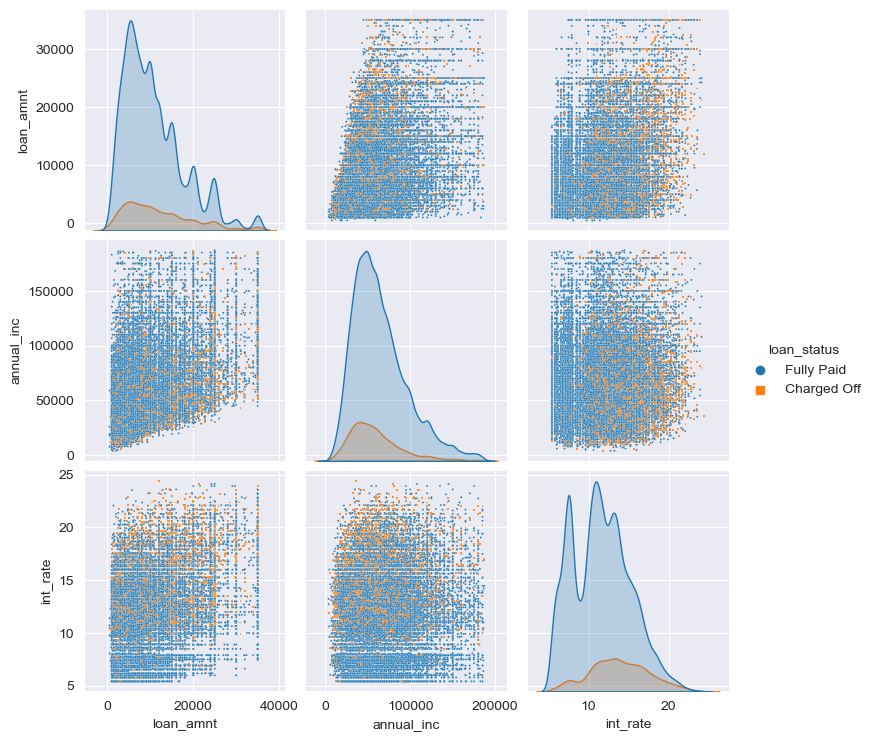

In [132]:
loan_df1 = loan_df[['loan_amnt', 'annual_inc','int_rate','loan_status']].copy()
loan_df1.head()

# loan_df1['loan_amnt'] = np.log10(loan_df1['loan_amnt'])
# loan_df1['annual_inc'] = np.log10(loan_df1['annual_inc'])
# loan_df1['int_rate'] = np.log10(loan_df1['int_rate'])

sns.pairplot(loan_df1, hue = 'loan_status',diag_kind='kde',markers=["o", "s"],plot_kws={"s": 2})
plt.show()

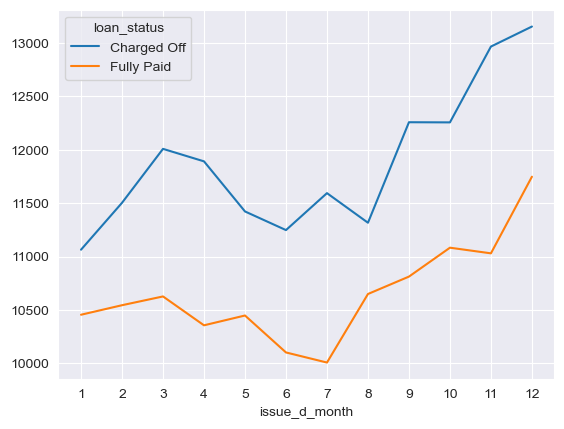

In [133]:
loan_df.pivot_table(values='loan_amnt', columns=['loan_status'], index=['issue_d_month'], aggfunc=np.mean).plot()
plt.xticks(ticks=loan_df.issue_d_month.unique())
plt.show()


In [134]:
loan_df.shape

(37751, 38)

## Summary

**Summary** :
Top drivers of default: 

- `grade` - Higher grade leads to higher interest rates & higher loan amounts which increases the probability of a default. 
- `term` -  Borrowers with `60 month` term defaulted more compared to `36 months`
- `int_rate` - Defaulters were paying a slightly higher interest rate on their loan
- `loan_amnt` - Defaulters had a higher median loan amount compared to others.
- `annual_inc` - Borrowers with annual income between `37k` and `75k` are likely to default more on loan amounts 
- `purpose` - Borrowers who mention their purpose as `small_business`, `debt_consolidation` and `credit_card` are likely to default more compared to others.
- `Borrower's state` - Borrowers from `CA`, `FL` and `NY` are more likely to default compared to other status.
- `verification_status` - Borrowers from `CA`, `FL`, `NY` are less likely to be verified as well. 

Github Repository: [AIML_C53_Lending_Club](https://github.com/sudarshan-g/AIML_C53_Lending_Club)

